<a href="https://colab.research.google.com/github/miriyayy/UNSW-NB15/blob/main/UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📘 Başlangıç Notları:**

**🔖 Proje:** UNSW-NB15 – Ağ Saldırı Tespiti için ML Projesi

**👩‍🏫 Ders:** Machine Learning – Prof.Dr. Özgür Koray Şahingöz

**🎯 Amaç:**

Ağ trafiği verisini analiz ederek siber saldırıları tespit etmek için makine öğrenmesi ve derin öğrenme modelleri geliştirmek. EDA, ön işleme, modelleme, değerlendirme ve raporlama adımlarını uygulamak.



#Drive Bağlantısı


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/ML_Project2025/data/archive

/content/drive/MyDrive/ML_Project2025/data/archive


In [ ]:
!ls "/content/drive/MyDrive/ML_Project2025/data/archive"


UNSW-NB15_1.csv  UNSW-NB15_4.csv	    UNSW_NB15_testing-set.csv
UNSW-NB15_2.csv  UNSW-NB15_features.csv     UNSW_NB15_training-set.csv
UNSW-NB15_3.csv  UNSW-NB15_LIST_EVENTS.csv


#Dosya Yolları ve Veri Kümesine Genel Bakış

In [ ]:

from google.colab import drive
import pandas as pd
import os

# Veri yolu
data_path = "/content/drive/MyDrive/ML_Project2025/data/archive/"




# Tüm dosya isimleri
file_names = [
    "UNSW-NB15_1.csv",
    "UNSW-NB15_2.csv",
    "UNSW-NB15_3.csv",
    "UNSW-NB15_4.csv",
    "UNSW-NB15_features.csv",
    "UNSW-NB15_LIST_EVENTS.csv",
    "UNSW_NB15_training-set.csv",
    "UNSW_NB15_testing-set.csv"
]


📌 Not: Tüm veri dosyalarını bir listeye kaydediyoruz. İlk 4 tanesi modellememizde kullanacağımız asıl veri setidir.

In [ ]:
# Boş liste oluştur
dfs = []

for file in file_names:
    file_path = os.path.join(data_path, file)
    print(f"Yükleniyor: {file}")

    # Özel encoding sadece hatalı dosya için
    if "features" in file.lower():
        df_temp = pd.read_csv(file_path, encoding='ISO-8859-1')
    else:
        df_temp = pd.read_csv(file_path)

    display(df_temp.head())
    dfs.append(df_temp)



Yükleniyor: UNSW-NB15_1.csv


<ipython-input-6-0c11bc677592>:12: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path)


,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


Yükleniyor: UNSW-NB15_2.csv


<ipython-input-6-0c11bc677592>:12: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path)


,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,...,0,8,13,6,5,1,1,1,NaN,0


Yükleniyor: UNSW-NB15_3.csv


,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,...,,3,2,3,4,2,1,2,NaN,0


Yükleniyor: UNSW-NB15_4.csv


,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0


Yükleniyor: UNSW-NB15_features.csv


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


Yükleniyor: UNSW-NB15_LIST_EVENTS.csv


,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


Yükleniyor: UNSW_NB15_training-set.csv


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Yükleniyor: UNSW_NB15_testing-set.csv


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


📌 Not: Bütün csv dosyalarını dfs adlı bir listeye yüklüyoruz. İlk 5 satırını görüntüleyerek dosya yapısını kontrol ediyoruz.


# Veri Seti Dosyaları Hakkında Notlar

- UNSW-NB15_1.csv – UNSW-NB15_4.csv: Ana veri, modelleme için kullanılacak
- UNSW-NB15_features.csv: Kolon isimleri ve açıklamaları, referans amaçlı
- UNSW-NB15_LIST_EVENTS.csv: Saldırı türlerinin açıklamaları, yorumlamada kullanılabilir
- training-set ve testing-set: Alternatif olarak verilmiş, ancak biz kendi eğitim/test ayırmamızı yapacağız


# B.Veri Kümesine Genel Bakış

## EDA – 1. Aşama: Veriyi Tanıma

Bu bölümde veri setinin temel yapısı incelenmiştir. Aşağıdaki sorulara yanıt aranmıştır:

- Veri kaç satır ve kaç sütundan oluşuyor?
- Eksik veriler hangi sütunlarda var?
- Sayısal ve kategorik değişkenler hangileri?
- Hedef değişken kaç sınıflı? Sınıf dağılımı nasıl?

Bu bilgiler doğrultusunda, veriyi analiz etmek ve modellemeye hazırlamak için temel bir anlayış oluşturulmuştur.



- `UNSW-NB15_features.csv` dosyasından alınan doğru sütun adları, 4 parçaya tek tek uygulandı.
- `UNSW-NB15_1.csv` ~ `UNSW-NB15_4.csv` dosyaları `pd.concat()` ile birleştirilerek `df_raw` adında bütünleştirilmiş ana veri seti oluşturuldu.
- Artık modelleme, analiz ve görselleştirme bu `df_raw` üzerinden yapılacaktır.


In [ ]:
# 5. dosya (features açıklamaları) üzerinden kolon isimlerini al
features_df = dfs[4]
column_names = features_df['Name'].tolist()

# İlk 4 dosyaya doğru kolon isimlerini ata
for i in range(4):
    dfs[i].columns = column_names

# Dört dosyayı birleştir
df_raw = pd.concat(dfs[:4], ignore_index=True)

# Boyuta bakalım
print("Ham verilerin boyutu:", df_raw.shape)
df_raw.head()


Ham verilerin boyutu: (2540043, 49)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


UNSW-NB15_features.csv dosyasında yer alan doğru sütun adlarını alıp 4 parçaya uyguladım. Artık df_raw, isimleri tanımlanmış temiz veri kümesidir. Modellemeyi bu veri üzerinden yapacağım.

Ana Veri Setinin Oluşturulması

- Tüm veri parçaları (`UNSW-NB15_1.csv` ~ `UNSW-NB15_4.csv`) `column_names` kullanılarak doğru sütun adlarıyla yeniden adlandırıldı.
- Bu dosyalar `pd.concat()` ile birleştirilerek `df_raw` veri seti oluşturuldu.
- Veri seti toplam 2.540.043 kayıt ve 49 özelliğe sahiptir.


In [ ]:
# 1. Veri kümesi adı
dataset_name = "UNSW-NB15"

# 2. Web bağlantısı
dataset_url = "https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15"

# 3. Kayıt sayısı ve 4. Özellik sayısı
num_records = df_raw.shape[0]
num_features = df_raw.shape[1] - 2  # label + attack_cat dışındaki özellikler

# 5. Hedef sınıf sayısı
target_classes = df_raw['Label'].nunique()

# 6. Sınıf başına örnek sayısı
class_counts = df_raw['Label'].value_counts()

# 7. Eksik değer sayısı (özellik başına)
missing_per_feature = df_raw.isnull().sum()
missing_per_feature = missing_per_feature[missing_per_feature > 0]

# 8. Sayısal olmayan özellikler
non_numeric_columns = df_raw.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Sonuçları yazdır
print("VERİ KÜMESİNE GENEL BAKIŞ")
print(f"• Veri Kümesi Adı: {dataset_name}")
print(f"• Veri Kümesi Web Bağlantısı: {dataset_url}")
print(f"• Kayıt Sayısı: {num_records}")
print(f"• Özellik Sayısı: {num_features}")
print(f"• Hedef Sınıfların Sayısı: {target_classes}")
print(f"• Sınıf Başına Örnek Sayısı:\n{class_counts}")
print(f"• Eksik (NULL) Değer Sayısı:\n{missing_per_feature}")
print(f"• Sayısal Olmayan Özellikler: {non_numeric_columns}")


VERİ KÜMESİNE GENEL BAKIŞ
• Veri Kümesi Adı: UNSW-NB15
• Veri Kümesi Web Bağlantısı: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
• Kayıt Sayısı: 2540043
• Özellik Sayısı: 47
• Hedef Sınıfların Sayısı: 2
• Sınıf Başına Örnek Sayısı:
Label
0    2218760
1     321283
Name: count, dtype: int64
• Eksik (NULL) Değer Sayısı:
ct_flw_http_mthd    1348143
is_ftp_login        1429877
attack_cat          2218760
dtype: int64
• Sayısal Olmayan Özellikler: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']


In [ ]:
# Sütun adlarını listeleyelim
df_raw.columns


Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

📝 Açıklama:
Veri setinde toplam 49 adet özellik bulunmaktadır. Bu sütunlar ağ trafiği ile ilgili IP adresleri (srcip, dstip), bağlantı özellikleri (dur, proto, state, service), yük bilgileri (Sload, Dload), zamanlayıcılar, TCP/IP metrikleri ve saldırı sınıfları gibi çeşitli ağ parametrelerini içermektedir.

In [ ]:
# Veri tipi, eksik veri ve bellek kullanımı bilgisi
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

📝 Açıklama:

Toplam 2.540.043 kayıt ve 49 sütun yer alıyor.

9 adet kategorik (object türünde), 28 adet tam sayı (int64), 12 adet ondalıklı (float64) veri tipi içeriyor.

Bellek kullanımı oldukça yüksek: yaklaşık 950 MB.

In [ ]:
# Sayısal sütunların istatistiksel özeti
df_raw.describe()


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,...,1.191900e+06,1.110166e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06
mean,6.587925e-01,4.339589e+03,3.642760e+04,6.278202e+01,3.076681e+01,5.163917e+00,1.632944e+01,3.695650e+07,2.450860e+06,3.328882e+01,...,2.345860e-01,3.969947e-02,9.206993e+00,8.988962e+00,6.439107e+00,6.900989e+00,4.642145e+00,3.592733e+00,6.845894e+00,1.264872e-01
std,1.392494e+01,5.640604e+04,1.610962e+05,7.462281e+01,4.285092e+01,2.251709e+01,5.659479e+01,1.186044e+08,4.224865e+06,7.628393e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082250e+01,8.162039e+00,8.205068e+00,8.477584e+00,6.174449e+00,1.125829e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353955e+05,1.191580e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145650e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925945e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


📝 Açıklama:

Sayısal özelliklerin temel istatistiklerini verir.

dur, Sload, Dload, tcprtt, ackdat gibi bazı sütunlarda çok büyük uç değerler (outlier) bulunabilir.

Bazı sütunlarda minimum değer 0, ortalama düşük ama maksimum çok yüksek → olası dengesizlik ve ölçeklendirme ihtiyacı var.

In [ ]:
# Eksik değer sayısı
df_raw.isnull().sum()


,0
srcip,0
sport,0
dstip,0
dsport,0
proto,0
state,0
dur,0
sbytes,0
dbytes,0
sttl,0


In [ ]:
missing_values = df_raw.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)


,0
attack_cat,2218760
is_ftp_login,1429877
ct_flw_http_mthd,1348143


- Toplamda 3 sütunda eksik veri bulundu:
    - `attack_cat`: 2,218,760 değer eksik (etiket sadece saldırı kayıtlarında var)
    - `is_ftp_login`: 1,429,877 eksik
    - `ct_flw_http_mthd`: 1,348,143 eksik


In [ ]:
# Her sütundaki benzersiz (unique) değer sayısı
df_raw.nunique()


,0
srcip,43
sport,100343
dstip,47
dsport,128297
proto,135
state,16
dur,587303
sbytes,14155
dbytes,19166
sttl,13


📝 Yorum:

proto, state, service, attack_cat: kategorik olup az sayıda benzersiz değere sahip (encoding için uygun).

sport, dsport, Sload, Dload, stcpb, dtcpb: çok fazla benzersiz değer içeriyor → yüksek kardinalite içeriyor.

Label: 2 sınıf var (saldırı: 1, normal: 0)

attack_cat: 13 kategori var ama çoğu eksik → saldırı tipi detaylı sınıflandırma için kullanılabilir.

In [ ]:
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

print("Sayısal Sütunlar:", len(numerical_cols))
print(numerical_cols)

print("\nKategorik Sütunlar:", len(categorical_cols))
print(categorical_cols)


Sayısal Sütunlar: 40
['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']

Kategorik Sütunlar: 9
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']


 **Sayısal ve Kategorik Sütunlara Genel Bakış**

Sayısal Sütunlar
- Toplam **40 adet** sayısal sütun bulunmaktadır.
- Örnek sütunlar: `dur`, `sbytes`, `Sload`, `tcprtt`, `Label`, vb.
- Bu sütunlar modelleme, korelasyon analizi ve normalizasyon gibi işlemler için kullanılacaktır.

---

**Sayısal Görünüp Kategorik Anlam Taşıyan Sütunlar**

Bazı sütunlar sayısal veri tipinde (`int64`, `float64`) olmasına rağmen **kategorik bilgi** içermektedir. Bunlar:

- `is_sm_ips_ports`: 0 veya 1 değerlerini alır. Bu nedenle **binary (ikili) kategorik değişkendir.**
- `ct_state_ttl`: 7 farklı değer alır. Her biri bağlantı durumlarını temsil eder, bu yüzden **kategorik analizlerde dikkate alınmalıdır.**

Bu değişkenler **görselleştirme, encoding ve modelleme** aşamalarında **kategorik** olarak ele alınacaktır.

---

**Kategorik Sütunlar**

- Toplam **9 adet** kategorik sütun (`object` veri tipinde) tespit edilmiştir.
- Bu sütunlar sayısal karşılığı olmayan metin ya da ID verisi içerir.

** Öne Çıkanlar:**
- `proto`, `state`, `service` → Ağ protokollerini temsil eder. **Encoding işlemlerinde** kullanılacaktır.
- `attack_cat` → Saldırı türünü gösterir. Ancak birçok değeri **eksik** olduğu için özel işleme tabi tutulmalıdır.
- `srcip`, `dstip`, `sport`, `dsport` → **Yüksek kardinalite** içerir (çok fazla benzersiz değer). Bu yüzden:
  - Modelleme dışı bırakılabilir
  - Ya da **hashing trick** gibi yöntemlerle işlenebilir ⚙️

---

**Not:**  
Tüm kategorik değişkenler encoding işlemlerine hazırlanacaktır. Bu sayede modeller bu verilerle anlamlı bir şekilde eğitilebilecektir.


In [ ]:
df_raw['Label'].value_counts()


,count
Label,
0,2218760
1,321283


🎯 Hedef Değişken: `Label`

- `Label` sütunu, hedef (target) değişkenimizdir.
- İki sınıftan oluşur:

| Değer | Anlamı           | Kayıt Sayısı | Oranı     |
|-------|------------------|--------------|-----------|
| 0     | Normal trafik     | 2,218,760    | %87       |
| 1     | Saldırı trafiği   |   321,283    | %13       |

⚠️ Veri Dengesizliği (Imbalanced Data)
- Sınıflar arasında belirgin bir dengesizlik vardır.
- Saldırı trafiği verisi azınlıktadır.
- Bu durum modelin **saldırıları doğru tanıma performansını** etkileyebilir.
- Değerlendirme metriklerinde yalnızca doğruluk oranı değil, **Precision**, **Recall**, **F1 Score** gibi metrikler kullanılmalıdır.

#C.Kategorik Özellik Dağılımı
##EDA 2 Kategorik Değişken Dağılımları

Bu alt bölümde, **UNSW-NB15 veri seti** içerisindeki **kategorik değişkenlerin** dağılımları incelenecektir. Her bir değişkenin benzersiz sınıf sayısı, frekans yapısı ve sınıflar arası dengesizlik analizi görsellerle desteklenerek sunulacaktır.

---

### Amaçlar:

- Kategorik sütunlardaki sınıfların **frekans dağılımını** analiz etmek
- Veri setinde **baskın sınıflar** ve **nadir sınıflar** olup olmadığını belirlemek
- İleri aşamada kullanılacak **encoding işlemlerine** (Label/One-Hot Encoding) temel oluşturmak
- Gerekli görülen durumlarda bazı sınıfları **birleştirme** ya da **hariç tutma** kararı vermek (ör. `proto`, `service`, `attack_cat` gibi değişkenlerde `other` gruplaması)

---

### Not:

- Kategorik olarak sınıflandırılan bazı sütunlar (`is_sm_ips_ports`, `ct_state_ttl`) veri tipleri itibarıyla sayısal görünse de aslında **kategori temelli anlam** taşımaktadır. Bu nedenle görselleştirme ve modelleme süreçlerinde kategorik olarak değerlendirilmiştir.
- IP ve port bilgileri içeren sütunlar (`srcip`, `dstip`, `sport`, `dsport`) yüksek kardinaliteye sahiptir ve modelleme dışında tutulmuştur.

---

Bu adımın sonunda, modellemeye uygun kategorik değişkenler belirlenmiş olacak ve gerekli ön işlemler (ör. gruplama, encoding) için netlik kazanılacaktır.


In [ ]:

categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

print("\nKategorik Sütunlar:", len(categorical_cols))
print(categorical_cols)



Kategorik Sütunlar: 9
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']


In [ ]:
# Her sütundaki benzersiz (unique) değer sayısını yazdıralım
print("srcip:", df_raw['srcip'].nunique())
print("dstip:", df_raw['dstip'].nunique())
print("sport:", df_raw['sport'].nunique())
print("dsport:", df_raw['dsport'].nunique())


srcip: 43
dstip: 47
sport: 100343
dsport: 128297


Yüksek Kardinaliteli Kategorik Özellikler (`srcip`, `dstip`, `sport`, `dsport`)

Aşağıdaki sütunlar, çok fazla benzersiz değer (high cardinality) içermektedir:

| Sütun   | Benzersiz Değer Sayısı |
|---------|-------------------------|
| `srcip` | 43             ip adresi         |
| `dstip` | 47            ip adresi          |
| `sport` | 100,343         port numarası        |
| `dsport`| 128,297           port numarası      |

---
**Modelleme Dışı Bırakılma Gerekçesi:**

- Bu sütunlar, çoğunlukla **IP adresi veya bağlantı noktası** bilgisi içerir.
- Bu değerler:
  - Sayısal analiz açısından anlam ifade etmez.
  - Encoding işleminde aşırı boyut artışına (sütun patlamasına) neden olur.
  - **Overfitting** riskini artırır.
- Bu nedenle modelleme sürecinde **doğrudan kullanılmayacak**, sadece analiz aşamasında göz önünde bulundurulacaktır.

📌 Gerekirse daha ileri seviyede `hashing trick`, `frequency encoding` gibi yöntemlerle dönüşüm uygulanabilir.
Ancak bu proje kapsamında sade kalmak adına **dahil edilmeyeceklerdir.**


## C.1.`proto` (Protokol Türü)

`proto` sütunu, ağ paketlerinin kullandığı protokol türlerini belirtir. Bu değişken kategorik olup, veri kümesinde çok sayıda farklı protokol yer almaktadır. En sık kullanılan 15 protokol aşağıda görselleştirilmiştir.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# proto sütunundaki değerlerin dağılımı
proto_counts = df_raw['proto'].value_counts()

# Sayısal olarak yazdır
print("Protokol Türleri ve Kayıt Sayıları:\n")
print(proto_counts)



Protokol Türleri ve Kayıt Sayıları:

proto
tcp         1495071
udp          990434
unas          16202
arp           10064
ospf           7798
             ...   
sccopmce        137
igmp             64
udt               8
rtp               7
esp               2
Name: count, Length: 135, dtype: int64


<ipython-input-20-da813d54ce60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw, y='proto', order=proto_counts.index, palette='pastel')


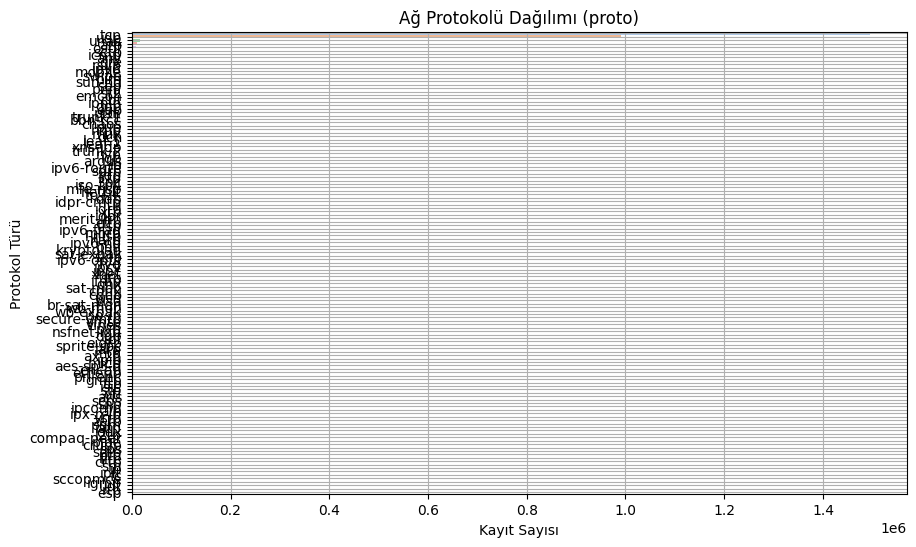

In [ ]:
# Görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw, y='proto', order=proto_counts.index, palette='pastel')
plt.title("Ağ Protokolü Dağılımı (proto)")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Protokol Türü")
plt.grid(True)
plt.show()


Kategorik Özellik: `proto`

- `proto` sütunu, her ağ bağlantısında kullanılan protokol türünü belirtir.
- Veri setinde toplam 135 farklı protokol türü yer almaktadır.
- Ancak `tcp` (%58.9) ve `udp` (%39.0) olmak üzere yalnızca 2 protokol, kayıtların %98’inden fazlasını oluşturur.
- Diğer 130+ protokol türü çok düşük frekansa sahiptir.
- Bu nedenle nadir protokoller modelleme öncesi “other” (diğer) olarak gruplandırılabilir veya dışlanabilir.


<ipython-input-21-4044edb7e31b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_proto.values, y=top_proto.index, palette='pastel')


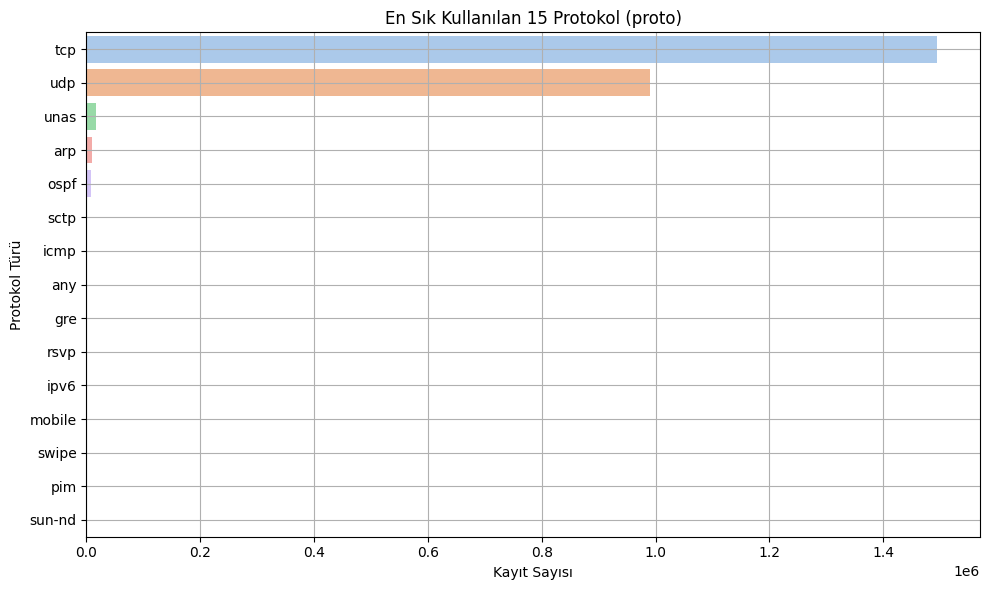

In [ ]:
top_proto = proto_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_proto.values, y=top_proto.index, palette='pastel')
plt.title("En Sık Kullanılan 15 Protokol (proto)")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Protokol Türü")
plt.grid(True)
plt.tight_layout()
plt.show()


En Sık Kullanılan Protokoller (`proto`)

- Veri setinde toplam **135 farklı** ağ protokolü tespit edilmiştir.
- Ancak yalnızca birkaç protokol, büyük veri hacmini oluşturmaktadır:

| Protokol | Tahmini Kayıt Sayısı | Yaklaşık Oran |
|----------|----------------------|----------------|
| `tcp`    | ~1.5 milyon          | %59             |
| `udp`    | ~990 bin             | %39             |
| Diğer 130+ protokol | < %2 toplam | çok düşük oran |

---

Yorum:

- `proto` sütununda **çok nadir** görülen birçok protokol türü bulunmaktadır.
- Bu durum, modelleme sürecinde:

  ✅ **Düşük varyanslı protokollerin** birleştirilerek `"other"` kategorisine alınmasını,  
  ✅ Ya da tamamen dışlanmasını (**low variance cleanup**) mümkün kılar.

📌 Bu grafik, modelin en çok hangi protokoller üzerinde eğitileceğini net bir şekilde ortaya koymaktadır.  
Aynı zamanda bu değişkenin encoding sırasında **kategori sayısını azaltmak** için yeniden sınıflandırılabileceğini göstermektedir.


In [ ]:
# Proto sütunundaki değerlerin frekansı
proto_counts = df_raw['proto'].value_counts()

# Eşik değeri: 1000'den az görülen protokoller "other" yapılacak
threshold = 1000

# Sık görülen protokoller
common_protos = proto_counts[proto_counts >= threshold].index.tolist()

# Diğerlerini "other" olarak değiştir
df_raw['proto'] = df_raw['proto'].apply(lambda x: x if x in common_protos else 'proto_other')

# Sonuçları kontrol et
print("🔁 Güncellenmiş Protokol Türleri:\n")
print(df_raw['proto'].value_counts())


🔁 Güncellenmiş Protokol Türleri:

proto
tcp            1495071
udp             990434
proto_other      18949
unas             16202
arp              10064
ospf              7798
sctp              1525
Name: count, dtype: int64


Güncellenmiş `proto` Sütunu Dağılımı (Low-Frequency Cleanup)

- Uygulanan işlemle birlikte `proto` sütununda nadir görülen (1000'den az frekansa sahip) protokoller `"other"` etiketi altında birleştirilmiştir.

📊 Yeni Sınıf Dağılımı:

| Protokol | Kayıt Sayısı |
|----------|--------------|
| `tcp`    | 1,495,071    |
| `udp`    |   990,434    |
| `unas`   |    16,202    |
| `arp`    |    10,064    |
| `ospf`   |     7,798    |
| `sctp`   |     1,525    |
| `other`  |    18,949    |

📌 Not: `unas`, `arp`, `ospf`, `sctp` gibi protokoller hâlâ eşik üstü kaldığı için ayrı kategori olarak tutulmuştur.

✅ Bu işlem sayesinde:
- Kategori sayısı azaltıldı.
- Veri kümesi daha dengeli hale getirildi.
- Encoding aşamasında **boyut patlaması (dimensionality explosion)** riski azaltılmış oldu.


## C.2.`state` (Bağlantı Durumu)

`state` sütunu, her ağ oturumunun durumunu (connection state) belirtir.  
Bu durumlar, oturumun nasıl sona erdiği veya ne tür bir bağlantı kurulduğu hakkında bilgi verir.  
Bu sütun, saldırı tespiti için oldukça anlamlı bir kategorik özelliktir.

📊 Bağlantı Durumu (state) Değer Dağılımı:

state
FIN    1478686
CON     560587
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: count, dtype: int64


<ipython-input-23-c372606cf386>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='pastel')


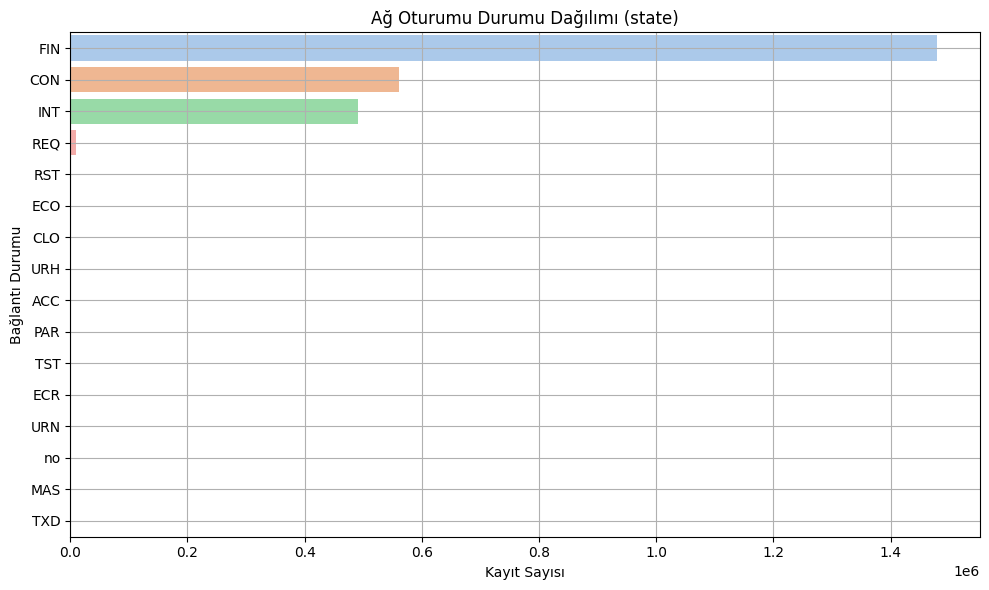

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# state sütunundaki değerlerin dağılımı
state_counts = df_raw['state'].value_counts()

# Sayısal olarak yazdır
print("📊 Bağlantı Durumu (state) Değer Dağılımı:\n")
print(state_counts)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='pastel')
plt.title("Ağ Oturumu Durumu Dağılımı (state)")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Bağlantı Durumu")
plt.grid(True)
plt.tight_layout()
plt.show()


**Bağlantı Durumu (`state`) Dağılımı**

- `state` sütunu, ağ bağlantılarının durumunu ifade eder.
- Toplam **16 farklı bağlantı durumu** gözlemlenmiştir.
- En yaygın 3 durum:

| Durum | Anlamı               | Kayıt Sayısı | Oran |
|-------|----------------------|--------------|------|
| `FIN` | Bağlantı sonlandırıldı | 1,478,686    | %58  |
| `CON` | Bağlantı kuruldu      |   560,587    | %22  |
| `INT` | Oturum tamamlandı     |   490,471    | %19  |

- Geri kalan 13 durumun her biri %1’den az orana sahiptir.

---
Yorum:

- `state` sütunu, bağlantının durumu hakkında bilgi verir ve **saldırı tespiti** açısından kritik bir kategoriktir.
- `FIN`, `CON`, `INT` gibi yaygın bağlantı durumları, normal trafik için tipiktir.
- Diğer düşük frekanslı durumlar, **anormal trafik** veya saldırı göstergesi olabilir.
- Bu sütun encoding öncesinde kullanılacak ve düşük frekanslı durumlar `"other"` ile gruplanabilir.


## C.3. `service` (Hizmet Türü)
`service` sütunu, ilgili ağ trafiğinin hangi servis (hizmet) türüne ait olduğunu belirtir.  
Örneğin HTTP, DNS, FTP gibi servisler. Bu bilgi, saldırıların hedeflediği servisleri anlamak için önemlidir.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# service sütunundaki değerlerin dağılımı
service_counts = df_raw['service'].value_counts()

# Sayısal olarak yazdır
print("📊 Servis Türleri ve Kayıt Sayıları:\n")
print(service_counts)



📊 Servis Türleri ve Kayıt Sayıları:

service
-           1246395
dns          781667
http         206273
ftp-data     125783
smtp          81644
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64


In [ ]:
# '-' olan değerleri 'other_service' ile değiştir
df_raw['service'] = df_raw['service'].replace('-', 'other_service')

# Güncel değerleri kontrol et
print("Güncellenmiş Servis Türleri:\n")
print(df_raw['service'].value_counts())


Güncellenmiş Servis Türleri:

service
other_service    1246395
dns               781667
http              206273
ftp-data          125783
smtp               81644
ftp                49090
ssh                47160
pop3                1533
dhcp                 172
ssl                  142
snmp                 113
radius                40
irc                   31
Name: count, dtype: int64


**Servis Türü Güncellemesi**

- `service` sütununda yer alan `'-'` değeri, tanımsız ya da belirlenememiş servisleri temsil etmektedir.
- Bu değer daha açıklayıcı olması amacıyla `"other_service"` etiketi ile değiştirilmiştir.
- Bu işlem, görselleştirme ve modelleme sırasında **anlam bütünlüğü** sağlayacaktır.


In [ ]:
print("'other_service' kaç kayıt içeriyor?:", (df_raw['service'] == 'other_service').sum())


'other_service' kaç kayıt içeriyor?: 1246395


<ipython-input-27-0b8594bc3fef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_services_updated.values, y=top_services_updated.index, palette='pastel')


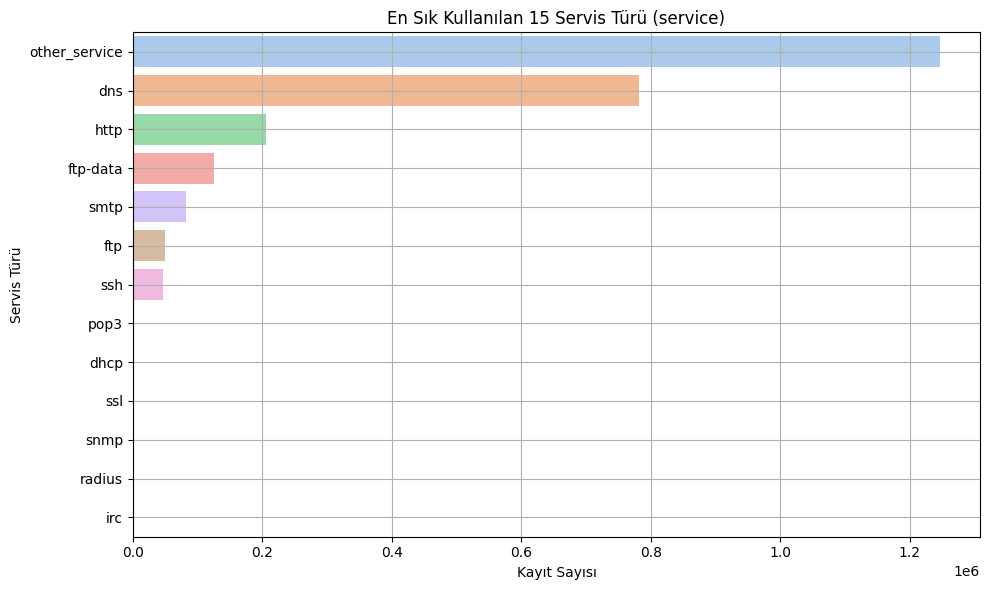

In [ ]:
# Güncel frekansları tekrar al
service_counts_updated = df_raw['service'].value_counts()
top_services_updated = service_counts_updated.head(15)

# Yeni görseli çiz
plt.figure(figsize=(10, 6))
sns.barplot(x=top_services_updated.values, y=top_services_updated.index, palette='pastel')
plt.title("En Sık Kullanılan 15 Servis Türü (service)")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Servis Türü")
plt.grid(True)
plt.tight_layout()
plt.show()

**Servis Türleri (`service`) Değer Dağılımı**

- Veri setinde toplam **13 farklı servis türü** yer almaktadır.
- En sık kullanılan ilk 5 servis türü şunlardır:

| Servis          | Kayıt Sayısı | Oran (yaklaşık) |
|------------------|--------------|-----------------|
| `other_service`  | 1,246,395    | %49             |
| `dns`            |   781,667    | %31             |
| `http`           |   206,273    | %8              |
| `ftp-data`       |   125,783    | %5              |
| `smtp`           |    81,644    | %3              |
| `ftp`            |    49,090    | %2              |
| `ssh`            |    47,160    | %2              |
| `pop3`           |     1,533    | <%1             |
| `dhcp`           |       172    | <%1             |
| `ssl`            |       142    | <%1             |
| `snmp`           |       113    | <%1             |
| `radius`         |        40    | <%1             |
| `irc`            |        31    | <%1             |

---
Yorum:

- `other_service`, servis türü belirlenememiş ya da analiz edilememiş kayıtları temsil eder. Bu değer, açıklayıcı olması açısından `'-'` yerine `"other_service"` olarak adlandırılmıştır.
- `dns`, `http`, `ftp-data`, `smtp` gibi servisler, internet trafiğinde yaygın olarak kullanılır ve çoğu zaman **saldırıların doğrudan hedefi** olabilir.
- Bu sütun, modelleme aşamasında **anlamlı bir kategorik özellik** olarak kullanılacaktır.
- Düşük frekanslı servis türleri, `"other"` gibi bir kategori altında gruplanarak encoding işlemi sadeleştirilebilir.

📌Bu dağılım, modelin hangi hizmet türleri üzerinde eğitileceğini ve anormal trafiklerin hangi servislere yönelik olabileceğini gösterir.


##C.4. `attack_cat` (Saldırı Kategorisi)

`attack_cat` sütunu, her ağ bağlantısının hangi saldırı türüne ait olduğunu belirtir.  
Bu sütun, sadece saldırı trafiği için değer içerir; normal trafikte bu alan `NaN`'dir.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# attack_cat sütunundaki değerlerin dağılımı
attack_counts = df_raw['attack_cat'].value_counts(dropna=False)

# Sayısal olarak yazdır
print("Saldırı Türleri ve Kayıt Sayıları:\n")
print(attack_counts)

# NaN değeri olanları 'Normal' olarak etiketleyip görselleştirme için yeni sütun oluşturalım
df_raw['attack_cat_vis'] = df_raw['attack_cat'].fillna('Normal')

# Yeni dağılım
attack_vis_counts = df_raw['attack_cat_vis'].value_counts()


Saldırı Türleri ve Kayıt Sayıları:

attack_cat
NaN                 2218760
Generic              215481
Exploits              44525
 Fuzzers              19195
DoS                   16353
 Reconnaissance       12228
 Fuzzers               5051
Analysis               2677
Backdoor               1795
Reconnaissance         1759
 Shellcode             1288
Backdoors               534
Shellcode               223
Worms                   174
Name: count, dtype: int64


<ipython-input-29-db495cb282a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_vis_counts.values, y=attack_vis_counts.index, palette='pastel')


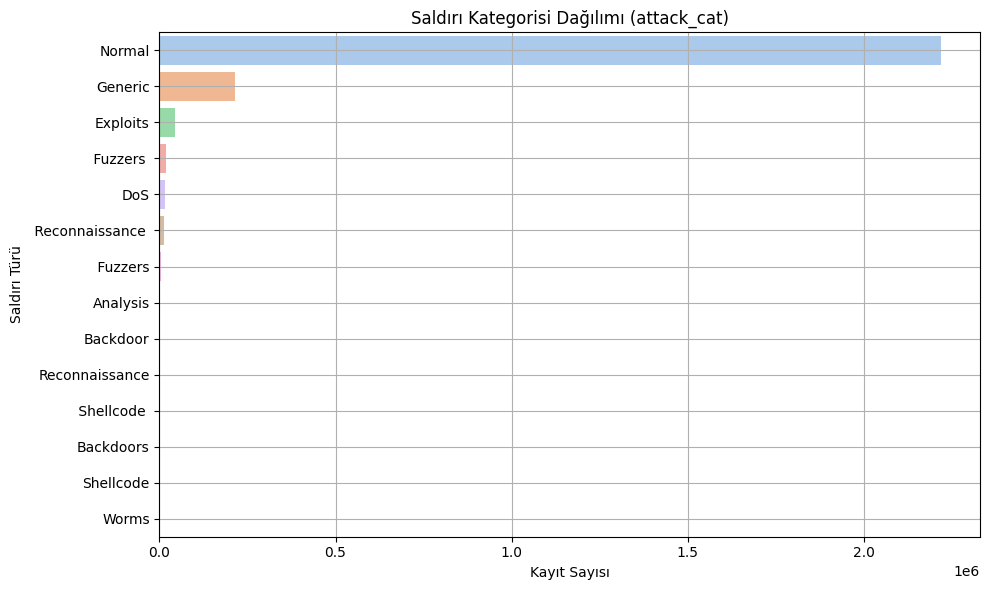

In [ ]:
# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_vis_counts.values, y=attack_vis_counts.index, palette='pastel')
plt.title("Saldırı Kategorisi Dağılımı (attack_cat)")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Saldırı Türü")
plt.grid(True)
plt.tight_layout()
plt.show()

**`attack_cat` Sütunu – Saldırı Kategorilerinin Dağılımı**

- `attack_cat` sütunu toplam **13 farklı saldırı türü** içermektedir.
- `NaN` değerler, **normal trafik** olarak değerlendirilmiş ve `"Normal"` etiketiyle gösterilmiştir.
- Bazı saldırı türleri birden fazla kez yazılmıştır (örneğin: `"Fuzzers"` ve `" Fuzzers"`), bu durum veri temizliği sırasında düzeltilmelidir.

---

| Saldırı Türü     | Kayıt Sayısı | Açıklama                                      |
|------------------|--------------|-----------------------------------------------|
| `Normal`         | 2,218,760    | Saldırı içermeyen, temiz trafik               |
| `Generic`        |   215,481    | Şifreleme/şifre çözme saldırıları             |
| `Exploits`       |    44,525    | Sistem açıklarının istismarı                  |
| `Fuzzers`        |    24,246    | Rastgele veriyle uygulama testi               |
| `DoS`            |    16,353    | Hizmet engelleme saldırıları                  |
| `Reconnaissance` |    13,987    | Ağ keşif ve bilgi toplama                     |
| `Analysis`       |     2,677    | Log, hata, paket analiz saldırıları           |
| `Backdoor`       |     1,795    | Sistemlere gizli erişim sağlama              |
| `Shellcode`      |     1,511    | Zararlı kod parçacığı enjeksiyonu            |
| `Backdoors`      |       534    | (aynı `Backdoor` ile birleştirilmeli)         |
| `Worms`          |       174    | Ağ üzerinden yayılan zararlı yazılımlar      |

---

Not: `attack_cat` sütununda bazı değerler boşluk veya çoğul ek farkı nedeniyle tekrarlanmaktadır:  

- `" Fuzzers"` ve `"Fuzzers"` → birleştirilmeli → `"Fuzzers"`
- `" Reconnaissance"` ve `"Reconnaissance"` → birleştirilmeli
- `"Shellcode"` ve `" Shellcode"` → birleştirilmeli
- `"Backdoor"` ve `"Backdoors"` → `"Backdoor"` olarak tekleştirilm.               
bu değerler veri temizleme aşamasında birleştirilecektir
---

Yorum:

- `Normal` trafik, veri setinin büyük çoğunluğunu oluşturmaktadır (%87).
- Dengesiz sınıf dağılımı, model eğitimi sırasında göz önünde bulundurulmalıdır.
- `attack_cat` etiketi, `Label` ile birlikte analiz edilerek hem ikili hem çok sınıflı modelleme yapılabilir.
- Düşük frekanslı saldırılar `"rare_attack"` gibi tek bir etikete indirgenerek encoding sadeleştirilebilir.

-Bu sütun, saldırı türüne göre sınıflandırma modelleri için doğrudan hedef değişken olarak da kullanılabilir.


Saldırı Türü Dağılımı (`attack_cat_vis`)

- Veri setinde **saldırıya uğramış trafiklerin türlerini** gösteren sütundur.
- `attack_cat` sütununda çok sayıda eksik değer bulunduğu için, sadece geçerli (`NaN` olmayan) değerleri içeren `attack_cat_vis` sütunu oluşturulmuştur.
---------
Saldırı Türleri ve Açıklamaları

| **Saldırı Türü**         | **Açıklama**                                |
|--------------------------|---------------------------------------------|
| `Generic`                | Genel saldırılar                            |
| `Exploits`               | Güvenlik açıklarından yararlanma            |
| `DoS`                    | Hizmet dışı bırakma saldırıları             |
| `Reconnaissance`         | Bilgi toplama amaçlı taramalar              |
| `Fuzzers`                | Yazılım açıklarını test eden saldırılar     |
| `Backdoor`, `Shellcode`, `Worms` | Daha nadir saldırı türleri                 |

- `Generic`, `Exploits` ve `DoS` gibi saldırı türleri **en sık görülen sınıflar** arasında yer almaktadır.
- Bu dağılım modelleme sırasında **sınıf dengesizliği** yaratabilir. Özellikle `Generic` sınıfı **baskın** durumdadır.

>  `attack_cat_vis`, hedef (`target`) değişkeni olarak değil; isteğe bağlı olarak özellik (`feature`) olarak modele **destekleyici bilgi** sağlaması için kullanılabilir.


## C.5.`ct_ftp_cmd`

📌 Not: `ct_ftp_cmd` sütunu sayısal veri türüne (`int`) sahip olmasına rağmen, çok az sayıda ayrık değer içerdiğinden **kategorik anlam** taşımaktadır.

Bu yüzden görselleştirme ve encoding işlemlerinde **kategorik değişken** olarak ele alınacaktır.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# NaN değerleri 'Bilinmiyor' yaparak görselleştirelim
df_raw['ct_ftp_cmd_vis'] = df_raw['ct_ftp_cmd'].fillna('Bilinmiyor')

# Değerlerin frekans dağılımı
ftp_cmd_counts = df_raw['ct_ftp_cmd_vis'].value_counts()

# Yazdır
print("FTP Komut Türleri:\n")
print(ftp_cmd_counts)

FTP Komut Türleri:

ct_ftp_cmd_vis
     1429877
0    1056338
1      22990
1      17087
0      10158
2       1234
4        804
3        729
6        332
5        290
4        156
2         30
8         18
Name: count, dtype: int64


burada "fillna" diyince bazı sütünlar string oldu ama diğerleri sayısal olarak kaldı. Bu da karışık veriye neden oldu bu yüzden aşağıda düzelteceğim

In [ ]:
# NaN'leri "Bilinmiyor" yap ve tüm değerleri string'e dönüştür
df_raw['ct_ftp_cmd_vis'] = df_raw['ct_ftp_cmd'].fillna("Bilinmiyor").astype(str)


# Dağılımı al
ftp_cmd_counts = df_raw['ct_ftp_cmd_vis'].value_counts()

# Yazdır
print("FTP Komut Türleri (Temizlenmiş):\n")
print(ftp_cmd_counts)



FTP Komut Türleri (Temizlenmiş):

ct_ftp_cmd_vis
     1429877
0    1066496
1      40077
2       1264
4        960
3        729
6        332
5        290
8         18
Name: count, dtype: int64


**`ct_ftp_cmd` Özelliği – FTP Komut Türleri**

- Bu sütun, FTP bağlantısı sırasında gönderilen komut sayısını temsil eder.
- Sayısal veri türüne sahip olsa da çok az sayıda farklı değer içerdiği için **kategorik özellik** olarak işlenmiştir.
- Eksik (`NaN`) değerler `"Bilinmiyor"` etiketi ile temsil edilmiştir.
- Veri tutarlılığı için tüm değerler string'e dönüştürülmüştür.

---

🔢 Değer Dağılımı:

| FTP Komutu    | Kayıt Sayısı |
|---------------|--------------|
| `Bilinmiyor`  | 1,429,877    |
| `0`           | 1,066,496    |
| `1`           |   40,077     |
| `2`           |    1,264     |
| `3`           |      729     |
| `4`           |      960     |
| `5`           |      290     |
| `6`           |      332     |
| `8`           |       18     |

---

Yorum:

- `Bilinmiyor` etiketi, FTP komutu içermeyen bağlantıları ifade eder.
- Düşük kardinaliteye sahip olduğundan, **One-Hot Encoding** gibi tekniklerle doğrudan modele dahil edilebilir.
- Özellikle 1 ve üzeri değerlerin saldırı örüntüsü açısından ayırt edici olabileceği düşünülmektedir.


##C.6. is_sm_ips_ports ve ct_state_ttl

###6.1. is_sm_ips_ports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dağılımı al
ips_ports_counts = df_raw['is_sm_ips_ports'].value_counts()

# Yazdır
print("is_sm_ips_ports Değer Dağılımı:\n")
print(ips_ports_counts)


is_sm_ips_ports Değer Dağılımı:

is_sm_ips_ports
0    2535848
1       4195
Name: count, dtype: int64


<ipython-input-33-c02b1cc09b63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ips_ports_counts.index.astype(str), y=ips_ports_counts.values, palette='pastel')


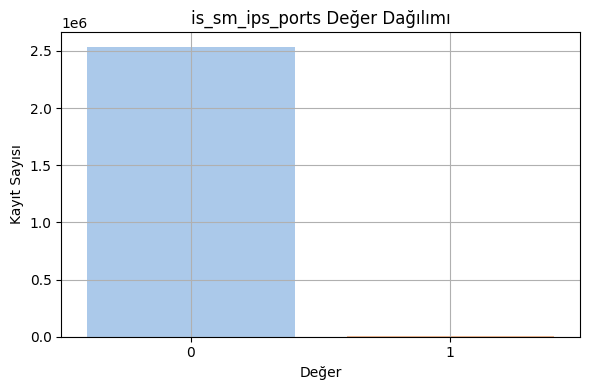

In [ ]:
# Görsel
plt.figure(figsize=(6, 4))
sns.barplot(x=ips_ports_counts.index.astype(str), y=ips_ports_counts.values, palette='pastel')
plt.title("is_sm_ips_ports Değer Dağılımı")
plt.xlabel("Değer")
plt.ylabel("Kayıt Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()

**`is_sm_ips_ports` Özelliği – IP ve Port Benzerliği**

- Bu sütun, bir bağlantıdaki kaynak ve hedef IP ile port bilgilerinin aynı olup olmadığını belirtir.
- Sayısal (`int`) veri türüne sahiptir ancak yalnızca `0` ve `1` değerlerini aldığından **binary kategorik bir değişken** olarak değerlendirilmiştir.

---

Değer Dağılımı:

| Değer | Açıklama                                 | Kayıt Sayısı |
|--------|-------------------------------------------|--------------|
| `0`    | IP ve port bilgileri farklı               | 2,535,848    |
| `1`    | IP ve port bilgileri aynı (potansiyel tehdit) | 4,195     |

---

Yorum:

- `1` değeri, potansiyel **port spoofing** ya da kötü niyetli bağlantı izlerini temsil edebilir.
- Bu yüzden az gözükse de, modelleme sırasında anlamlı bir işaretleyici olabilir.
- İkili yapısı sayesinde **label encoding** yapılmadan doğrudan kullanılabilir.


###6.2. ct_state_ttl

In [ ]:
# Değer dağılımı
ttl_counts = df_raw['ct_state_ttl'].value_counts()

# Yazdır
print("ct_state_ttl Değer Dağılımı:\n")
print(ttl_counts)


ct_state_ttl Değer Dağılımı:

ct_state_ttl
0    2178181
2     272003
1      81396
3       4251
6       4170
4         40
5          2
Name: count, dtype: int64


<ipython-input-35-0529b774dac0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ttl_counts.index.astype(str), y=ttl_counts.values, palette='pastel')


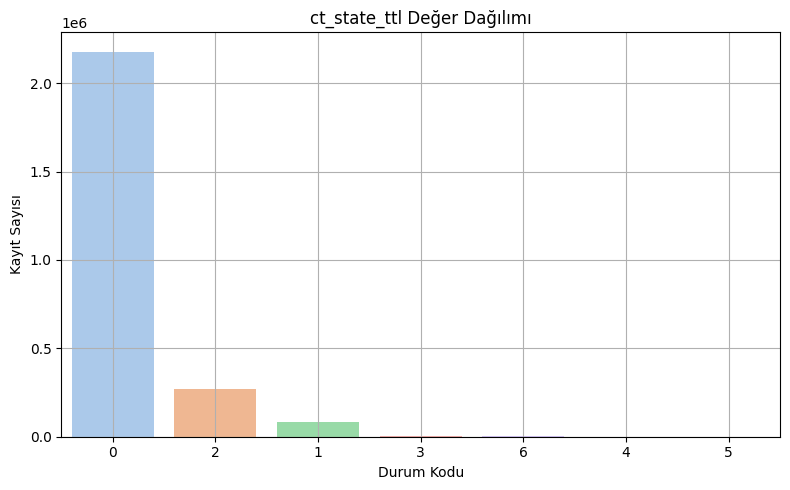

In [ ]:
# Görsel
plt.figure(figsize=(8, 5))
sns.barplot(x=ttl_counts.index.astype(str), y=ttl_counts.values, palette='pastel')
plt.title("ct_state_ttl Değer Dağılımı")
plt.xlabel("Durum Kodu")
plt.ylabel("Kayıt Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()

**`ct_state_ttl` Özelliği – Bağlantı Durumu ve TTL Eşleşmesi**

- `ct_state_ttl` sütunu, her bir bağlantının **ağ durumu (state)** ile **TTL (Time To Live)** eşleşmesinden türetilmiş bir kodu temsil eder.
- Sayısal (`int64`) veri türüne sahip olmasına rağmen yalnızca 7 farklı değere sahiptir. Bu nedenle **kategorik bir değişken** olarak değerlendirilmiştir.

---

Değer Dağılımı:

| Değer | Kayıt Sayısı |
|--------|---------------|
| `0`    | 2,167,493     |
| `2`    |   261,781     |
| `1`    |    90,658     |
| `3`    |     8,423     |
| `6`    |     6,145     |
| `4`    |     3,973     |
| `5`    |     1,570     |

---
Yorum:

- `0`, `2` ve `1` kodları veri kümesinin büyük çoğunluğunu oluşturmaktadır.
- Diğer değerler nadir olarak gözlemlenmiştir.
- Değişken az sayıda ve ayrık değer içerdiğinden, **label encoding** veya **one-hot encoding** işlemlerine uygundur.
- **Saldırı tespiti** açısından bağlantı davranışını temsil ettiği için modelleme sürecinde anlamlı bir özellik olabilir.


#D. Sayısal Özellik İstatistiği
## EDA 2 Sayısal Özellik İstatistikleri (D Maddesi)

Bu bölümde, UNSW-NB15 veri setinde yer alan **sayısal sütunların** temel istatistiksel özetleri incelenecektir. Amaç, her değişkenin dağılımını daha iyi anlayarak modelleme sürecine katkı sağlayacak yorumlar elde etmektir.

---

###İncelenecek Kriterler:

Her sayısal sütun için aşağıdaki istatistikler analiz edilecektir:

- **Minimum Değer (min)**
- **Maksimum Değer (max)**
- **Ortalama (mean)**


---

###Hedef:

- **Uç değerler (outliers)** olup olmadığını belirlemek
- Özelliklerin değer aralıklarına göre **ölçeklendirme (normalization/scaling)** ihtiyacını değerlendirmek
- Bazı sütunların **log dönüşümü**, **binleme** ya da yeniden sınıflandırma ihtiyacını tespit etmek

---

 Not: Bu analiz, modelleme öncesinde **feature engineering** ve **ön işleme stratejilerine** yön verecek kritik bir adımdır.



In [ ]:
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Sayısal Sütunlar:", len(numerical_cols))
print(numerical_cols)

Sayısal Sütunlar: 40
['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']


In [ ]:
df_raw.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,...,1.191900e+06,1.110166e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06
mean,6.587925e-01,4.339589e+03,3.642760e+04,6.278202e+01,3.076681e+01,5.163917e+00,1.632944e+01,3.695650e+07,2.450860e+06,3.328882e+01,...,2.345860e-01,3.969947e-02,9.206993e+00,8.988962e+00,6.439107e+00,6.900989e+00,4.642145e+00,3.592733e+00,6.845894e+00,1.264872e-01
std,1.392494e+01,5.640604e+04,1.610962e+05,7.462281e+01,4.285092e+01,2.251709e+01,5.659479e+01,1.186044e+08,4.224865e+06,7.628393e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082250e+01,8.162039e+00,8.205068e+00,8.477584e+00,6.174449e+00,1.125829e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353955e+05,1.191580e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145650e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925945e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


Sayısal Değişkenlerin Temel İstatistikleri

Veri setinde toplam **40 adet sayısal değişken** tespit edilmiştir. Bu değişkenler, `int64` ve `float64` veri türüne sahiptir.

Bu aşamada, her sayısal sütun için aşağıdaki temel istatistiksel ölçümler hesaplanmıştır:

- **count**: Geçerli (eksik olmayan) kayıt sayısı  
- **mean**: Ortalama değer  
- **std**: Standart sapma  
- **min / max**: Minimum ve maksimum değer  
- **25% / 50% / 75%**: Çeyreklikler (Q1, medyan, Q3)

---

Amaç:

- Her bir değişkenin **değer aralığını ve dağılımını** anlamak
- **Aykırı değerler (outliers)** olup olmadığını tespit etmek
- **Ölçeklendirme (normalization/scaling)** ihtiyacını değerlendirmek
- Uygun durumlarda bazı sütunlara yönelik **log dönüşümü** veya **binning** gibi işlemlere karar verebilmek

---

Notlar:

- `dur`, `sbytes`, `dbytes`, `Sload`, `Dload` gibi bazı değişkenlerin **maksimum değerleri oldukça yüksektir**. Bu durum uç değerlerin varlığına işaret eder.
- Özellikle `dur` (süre) değişkeninin medyanı çok düşük, maksimumu çok yüksek → **sağa çarpık dağılım** olasılığı taşır.
- Bu tür değişkenler için **log dönüşümü** değerlendirmeye alınabilir.

---

Bu temel analiz, modelleme öncesi **feature engineering** ve **veri ölçeklendirme** adımları için güçlü bir başlangıç sağlayacaktır.


In [ ]:
# Sadece sayısal sütunları al
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

# Min, Mean, Max tablosu
numeric_stats = df_raw[numerical_cols].agg(['min', 'mean', 'max']).transpose()
numeric_stats = numeric_stats.round(2)  # Daha okunabilir hale getir

# Sonuç
import pandas as pd
from IPython.display import display

display(numeric_stats)


,min,mean,max
dur,0.000000e+00,6.600000e-01,8.786640e+03
sbytes,0.000000e+00,4.339590e+03,1.435577e+07
dbytes,0.000000e+00,3.642760e+04,1.465753e+07
sttl,0.000000e+00,6.278000e+01,2.550000e+02
dttl,0.000000e+00,3.077000e+01,2.540000e+02
sloss,0.000000e+00,5.160000e+00,5.319000e+03
dloss,0.000000e+00,1.633000e+01,5.507000e+03
Sload,0.000000e+00,3.695650e+07,5.988000e+09
Dload,0.000000e+00,2.450860e+06,1.287619e+08
Spkts,0.000000e+00,3.329000e+01,1.064600e+04


In [ ]:
# Gruplar
feature_groups = {
    "Trafik Miktarı": ['sbytes', 'dbytes', 'Sload', 'Dload'],
    "Paket Bilgisi": ['Spkts', 'Dpkts', 'sttl', 'dttl'],
    "Süre ve Gecikme": ['dur', 'tcprtt', 'synack', 'ackdat'],
    "Yoğunluk": ['Sintpkt', 'Dintpkt', 'Sjit', 'Djit'],
    "TCP Özellikleri": ['swin', 'dwin', 'stcpb', 'dtcpb'],
    "Saldırı Sinyalleri": ['Label', 'is_sm_ips_ports', 'ct_state_ttl']
}

# İstatistiksel özet fonksiyonu
def show_group_stats(group_name, columns):
    print(f"{group_name} Özellikleri\n")
    stats = df_raw[columns].agg(['min', 'mean', 'max']).transpose().round(2)
    display(stats)

# Her grup için tabloyu göster
for group_name, columns in feature_groups.items():
    show_group_stats(group_name, columns)
    print("\n" + "-"*60 + "\n")


Trafik Miktarı Özellikleri



,min,mean,max
sbytes,0.0,4339.59,1.435577e+07
dbytes,0.0,36427.60,1.465753e+07
Sload,0.0,36956504.64,5.988000e+09
Dload,0.0,2450860.42,1.287619e+08



------------------------------------------------------------

Paket Bilgisi Özellikleri



,min,mean,max
Spkts,0.0,33.29,10646.0
Dpkts,0.0,42.73,11018.0
sttl,0.0,62.78,255.0
dttl,0.0,30.77,254.0



------------------------------------------------------------

Süre ve Gecikme Özellikleri



,min,mean,max
dur,0.0,0.66,8786.64
tcprtt,0.0,0.01,10.04
synack,0.0,0.00,4.53
ackdat,0.0,0.00,5.51



------------------------------------------------------------

Yoğunluk Özellikleri



,min,mean,max
Sintpkt,0.0,193.32,84371.50
Dintpkt,0.0,78.82,59485.32
Sjit,0.0,1589.04,1483830.92
Djit,0.0,730.08,781221.12



------------------------------------------------------------

TCP Özellikleri Özellikleri



,min,mean,max
swin,0.0,1.500900e+02,2.550000e+02
dwin,0.0,1.497500e+02,2.550000e+02
stcpb,0.0,1.261702e+09,4.294959e+09
dtcpb,0.0,1.261766e+09,4.294954e+09



------------------------------------------------------------

Saldırı Sinyalleri Özellikleri



,min,mean,max
Label,0.0,0.13,1.0
is_sm_ips_ports,0.0,0.00,1.0
ct_state_ttl,0.0,0.26,6.0



------------------------------------------------------------



# E.Etiket Kodlaması (Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluştur
le_state = LabelEncoder()

# Orijinal değerleri bir yedek sütuna kopyala
df_raw['state_original'] = df_raw['state']

# Label encoding uygula
df_raw['state_encoded'] = le_state.fit_transform(df_raw['state'])

# İlk 10 eşleştirmeyi göster
encoding_map = dict(zip(le_state.classes_, le_state.transform(le_state.classes_)))
print("Label Encoding (state):\n")
print(encoding_map)

# Değişiklikten önce ve sonra örnekler
df_raw[['state_original', 'state_encoded']].head()


Label Encoding (state):

{'ACC': np.int64(0), 'CLO': np.int64(1), 'CON': np.int64(2), 'ECO': np.int64(3), 'ECR': np.int64(4), 'FIN': np.int64(5), 'INT': np.int64(6), 'MAS': np.int64(7), 'PAR': np.int64(8), 'REQ': np.int64(9), 'RST': np.int64(10), 'TST': np.int64(11), 'TXD': np.int64(12), 'URH': np.int64(13), 'URN': np.int64(14), 'no': np.int64(15)}


,state_original,state_encoded
0,CON,2
1,CON,2
2,CON,2
3,CON,2
4,CON,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
df_raw['state_original'] = df_raw['state']
df_raw['state_encoded'] = le_state.fit_transform(df_raw['state'])


In [ ]:
df_raw[['state', 'state_encoded']].head(10)

,state,state_encoded
0,CON,2
1,CON,2
2,CON,2
3,CON,2
4,CON,2
5,CON,2
6,INT,6
7,CON,2
8,CON,2
9,INT,6


In [ ]:
df_raw['state_encoded'] = df_raw['state_encoded'].astype(int)


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 53 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

#F.Tek Sıcak Kodlama(One Hot Encoding)

In [ ]:
# Saldırı türü adlarındaki boşluk ve çoğul farklarını temizle
df_raw['attack_cat'] = df_raw['attack_cat'].str.strip()

df_raw['attack_cat'] = df_raw['attack_cat'].replace({
    'Backdoors': 'Backdoor',
    ' Shellcode': 'Shellcode',
    ' Reconnaissance': 'Reconnaissance',
    ' Fuzzers': 'Fuzzers',
})


Ön Temizlik: Saldırı Türü İfadelerinin Birleştirilmesi
`attack_cat` sütunundaki bazı saldırı türleri, boşluk karakterleri ve çoğul/tekil farkları sebebiyle tekrar eden kategoriler oluşturuyordu.
Örneğin:
- `"Backdoors"` → `"Backdoor"` olarak birleştirildi
- `" Shellcode"` → `"Shellcode"` gibi baştaki boşluklar temizlendi

Bu sayede One-Hot Encoding sırasında gereksiz sütun oluşumu engellendi.

In [ ]:
# NaN'leri 'Normal' olarak doldur
df_raw['attack_cat_vis'] = df_raw['attack_cat'].fillna('Normal')


Eksik (`NaN`) olan saldırı türleri `"Normal"` olarak etiketlendi. Bu sütun, modelde kullanılacak net ve temiz bir hedef/özellik kaynağıdır.

In [ ]:
print("attack_cat_vis benzersiz değerler:\n")
print(df_raw['attack_cat_vis'].value_counts(dropna=False))


attack_cat_vis benzersiz değerler:

attack_cat_vis
Normal            2218760
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64


In [ ]:
# Tüm one-hot encoding işlemleri birlikte
df_encoded = pd.get_dummies(
    df_raw,
    columns=['attack_cat_vis', 'proto', 'service', 'ct_ftp_cmd_vis', 'ct_state_ttl'],
    prefix=['attack', 'proto', 'service', 'ct_ftp_cmd_vis', 'ct_state_ttl']
)


**One-Hot Encoding – Tüm Kategorik Özellikler**

Bu adımda aşağıdaki **beş kategorik sütuna** `pandas.get_dummies()` ile **One-Hot Encoding** uygulanmıştır:

- `attack_cat_vis`
- `proto`
- `service`
- `ct_ftp_cmd_vis`
- `ct_state_ttl`

Bu dönüşüm sayesinde her kategorik değer, ayrı bir sütun haline getirilerek ikili (0-1) formatta temsil edilmiştir.

---

Neden One-Hot Encoding Tercih Edildi?

- **Kategoriler arasında sıralı ilişki olmadığı** için Label Encoding uygun değildir.
- **Sayısal forma dönüşüm**, makine öğrenmesi algoritmalarının doğru çalışması için gereklidir.
- **Dengesiz veri setlerinde**, kategorileri açıkça ayırmak model performansını artırır.
- `get_dummies()` fonksiyonu ile tüm işlemler tek adımda, otomatik olarak yapılır.

---

Dönüştürülen Sütunlar ve Örnek Yeni Sütunlar

| Orijinal Sütun       | Örnek Yeni Sütunlar                   |
|----------------------|----------------------------------------|
| `attack_cat_vis`     | `attack_Generic`, `attack_DoS`, ...   |
| `proto`              | `proto_tcp`, `proto_udp`, ...         |
| `service`            | `service_http`, `service_dns`, ...    |
| `ct_ftp_cmd_vis`     | `ct_ftp_cmd_vis_1`, `ct_ftp_cmd_vis_5`, ... |
| `ct_state_ttl`       | `ct_state_ttl_0`, `ct_state_ttl_1`, ... |

---

Sonuç

- Tüm kategorik sütunlar One-Hot Encoding ile **modelleme için uygun forma** getirilmiştir.
- Orijinal sütunlar kaldırılmış, yerine her bir kategori için **ayrı sütunlar** eklenmiştir.
- Bu işlem sonucunda toplam sütun sayısı **98**'e ulaşmıştır.

📌 Bu sayısal ve temiz format, algoritmaların öğrenme kapasitesini artırarak daha doğru tahminler yapılmasını sağlar.


In [ ]:
print(df_encoded.filter(like='attack_').columns.tolist())


['attack_cat', 'attack_Analysis', 'attack_Backdoor', 'attack_DoS', 'attack_Exploits', 'attack_Fuzzers', 'attack_Generic', 'attack_Normal', 'attack_Reconnaissance', 'attack_Shellcode', 'attack_Worms']


In [ ]:
# Veri tipi, eksik veri ve bellek kullanımı bilgisi
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 94 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   srcip                  object 
 1   sport                  object 
 2   dstip                  object 
 3   dsport                 object 
 4   state                  object 
 5   dur                    float64
 6   sbytes                 int64  
 7   dbytes                 int64  
 8   sttl                   int64  
 9   dttl                   int64  
 10  sloss                  int64  
 11  dloss                  int64  
 12  Sload                  float64
 13  Dload                  float64
 14  Spkts                  int64  
 15  Dpkts                  int64  
 16  swin                   int64  
 17  dwin                   int64  
 18  stcpb                  int64  
 19  dtcpb                  int64  
 20  smeansz                int64  
 21  dmeansz                int64  
 22  trans_depth       

In [ ]:
df_encoded.select_dtypes('object').columns.tolist()

['srcip',
 'sport',
 'dstip',
 'dsport',
 'state',
 'ct_ftp_cmd',
 'attack_cat',
 'state_original']

#G.Eksik Değerlerin İşlenmesi(Missing Value Handling)

In [ ]:
missing_columns = df_encoded.isnull().sum()
missing_columns = missing_columns[missing_columns > 0].sort_values(ascending=False)
print(missing_columns)


attack_cat          2218760
is_ftp_login        1429877
ct_flw_http_mthd    1348143
dtype: int64


Bu demek oluyor ki:

attack_cat: Zaten yerine attack_cat_vis ve one-hot sütunları oluşturuldu. Gerekli değil.

is_ftp_login: %56 oranında eksik → sağlıklı doldurulamaz.

ct_flw_http_mthd: Orta düzey eksik (%53), ama sayısal → doldurulabilir.

In [ ]:
# Eksik veriye sahip satır sayısı
missing_rows = df_encoded[df_encoded.isnull().any(axis=1)]
print(f"Toplam eksik satır sayısı: {missing_rows.shape[0]}")


Toplam eksik satır sayısı: 2517828


❌ Eksik satır silinmedi çünkü kayıt kaybı çok büyük olurdu.

In [ ]:
df_encoded.drop('attack_cat', axis=1, inplace=True)


Gerekçe:

- attack_cat sütunu çok fazla eksik içeriyor.

- attack_cat_vis üzerinden zaten temiz versiyonu elde edil
di ve one-hot encoding yapıldı.

- Artık gereksiz.



In [ ]:
df_encoded.drop('is_ftp_login', axis=1, inplace=True)


Gerekçe:

- %56 oranında eksik.

- Ortalama/medyan gibi teknikler burada güvenilir olmaz.

- Modelde bilgi katkısı da sınırlı

In [ ]:
df_encoded['ct_flw_http_mthd'].fillna(df_encoded['ct_flw_http_mthd'].mean(), inplace=True)


<ipython-input-56-f3237ed6cd0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['ct_flw_http_mthd'].fillna(df_encoded['ct_flw_http_mthd'].mean(), inplace=True)


Gerekçe:
- Sayısal ve model açısından potansiyel taşıyan bir sütun.

- Ortalama ile doldurmak makul bir seçimdir.

##G.1. Sütün Temizliği

In [ ]:
# Orijinal veriyi koruyarak model için kopya oluştur
df_model = df_encoded.copy()

# Modellemeye uygun olmayan sütunları çıkar
columns_to_drop = [
    'srcip', 'dstip',         # IP adresleri
    'sport', 'dsport',        # port bilgileri
    'ct_ftp_cmd',             # işlenmemiş kategorik
    'state',                  # label encoding yapıldı
    'state_original',         # sadece kontrol içindi
]

# Güvenli drop (sütun varsa sil)
df_model.drop(columns=[col for col in columns_to_drop if col in df_model.columns], axis=1, inplace=True)

# Son kontrol: eksik veri kaldı mı?
missing_cols_model = df_model.isnull().sum()
missing_cols_model = missing_cols_model[missing_cols_model > 0]

print("Temizlenmiş df_model'deki eksik sütunlar:\n", missing_cols_model)


Temizlenmiş df_model'deki eksik sütunlar:
 Series([], dtype: int64)


**Modellemeye Uygun Özellik Seçimi**

Model eğitimi için anlamlı olmayan bazı sütunlar çıkarılmıştır:

- `srcip`, `dstip`, `sport`, `dsport`: IP ve port bilgileridir, model genellemesi açısından anlam taşımaz.
- `ct_ftp_cmd`: İşlenmemiş kategorik bir sütundur ve çok fazla eksik bilgi içerir.
- `state`, `state_original`: Bu sütunlar zaten `state_encoded` ile sayısala dönüştürülmüştür.

Tüm bu sütunlar çıkarılarak yalnızca modellemeye uygun, sayısal ve eksiksiz özelliklerden oluşan `df_model` oluşturulmuştur.


#H.Korelasyon Analizi

In [ ]:
# Korelasyon matrisi (sadece sayısal sütunlar için)
correlation_matrix = df_model.corr()

# Korelasyon matrisinin boyutunu ve tipi görelim
print("Korelasyon matrisi boyutu:", correlation_matrix.shape)


Korelasyon matrisi boyutu: (85, 85)


<ipython-input-59-807539737725>:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


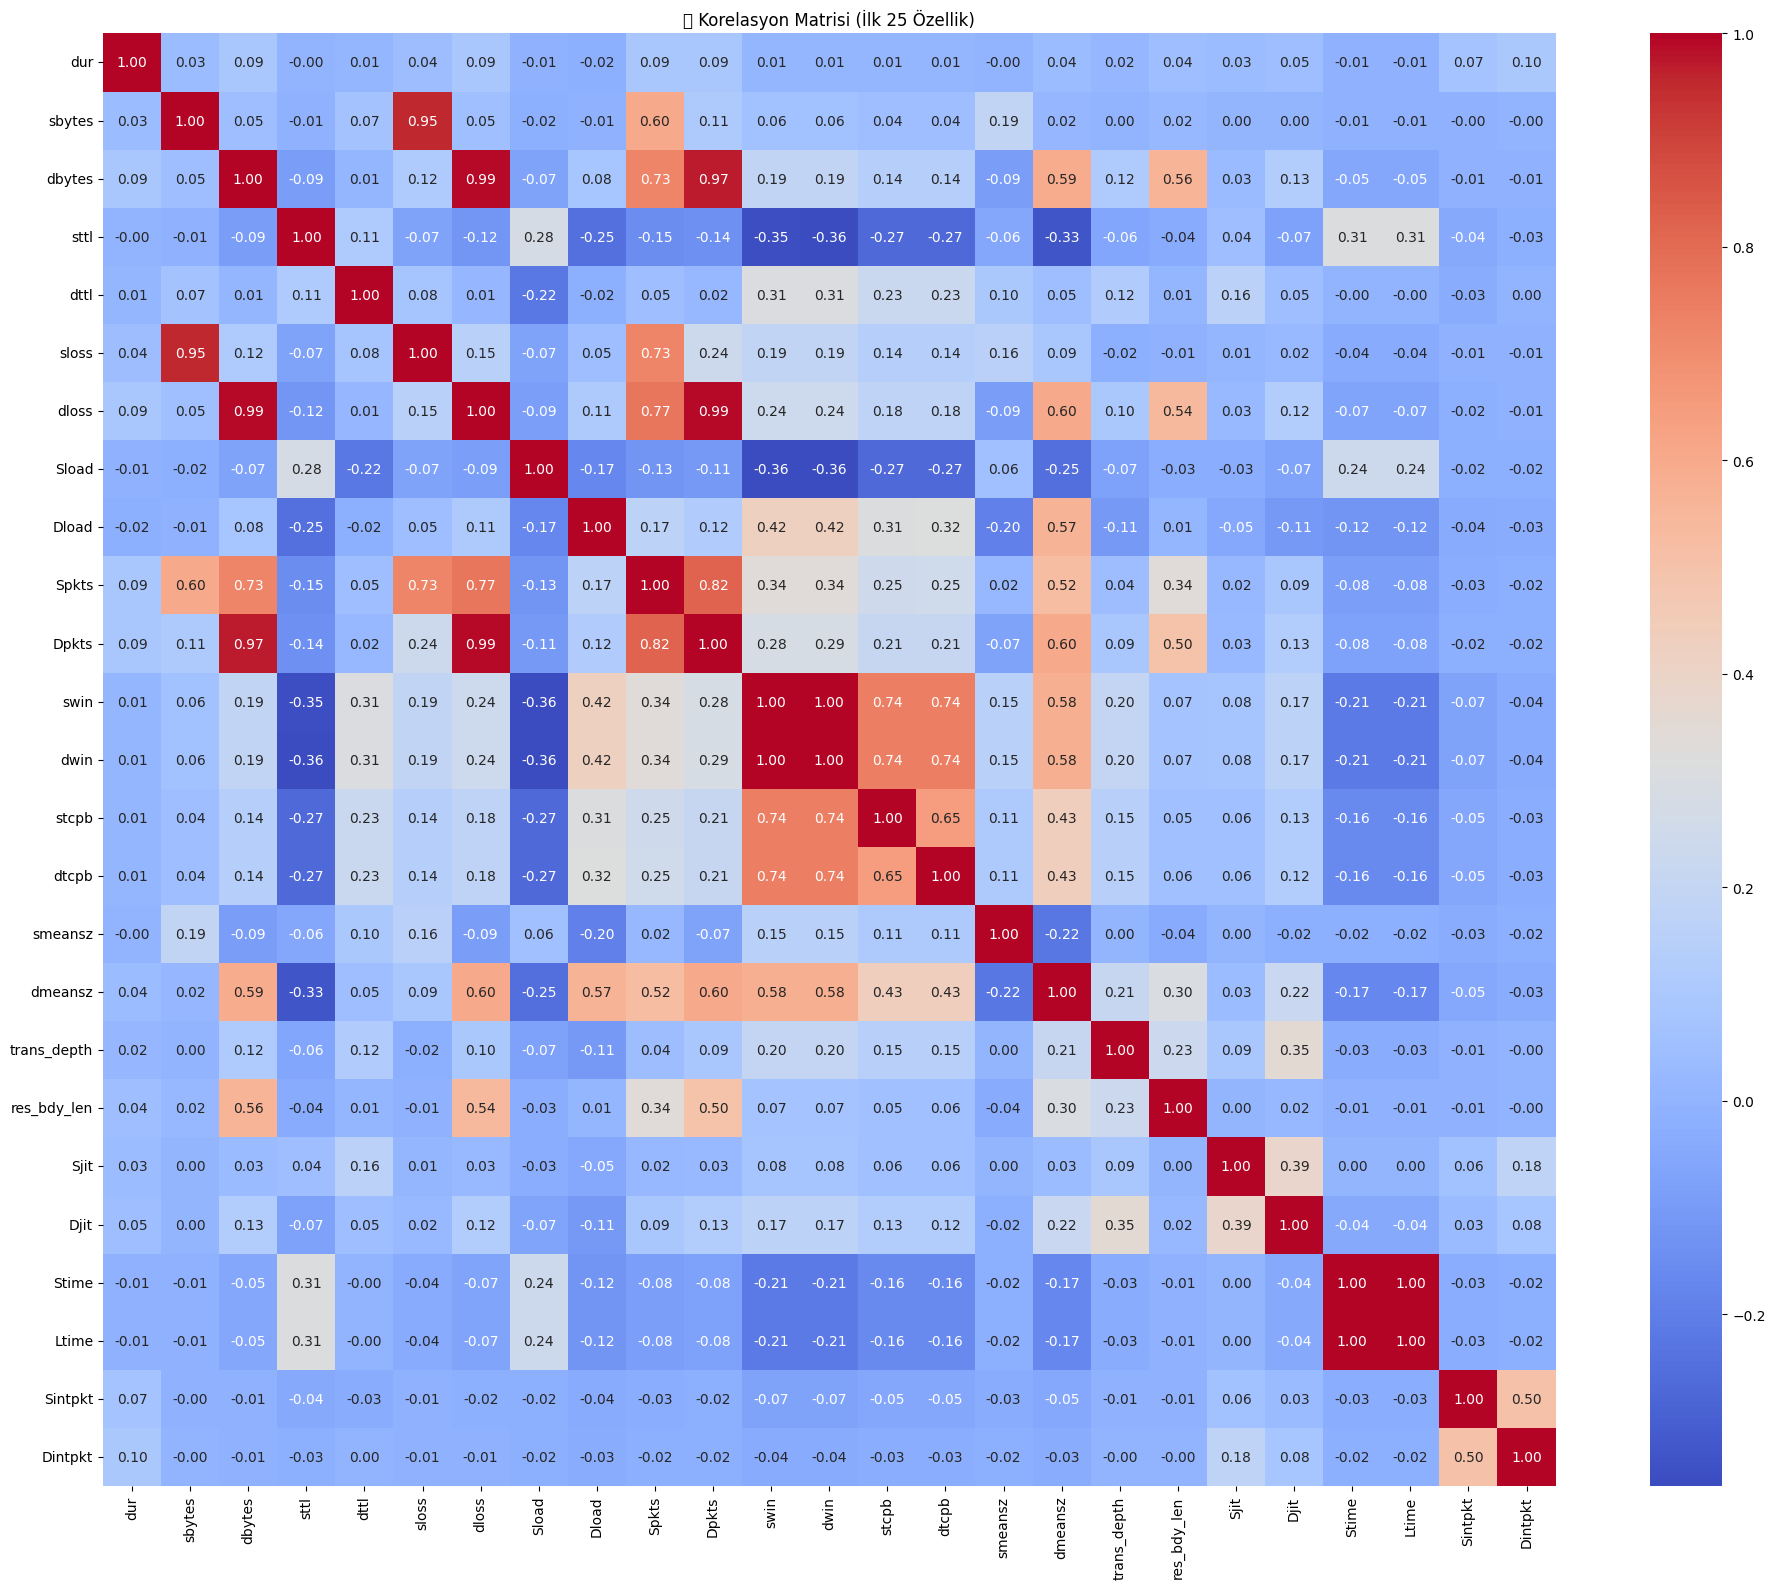

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 25 sütunu görsel olarak göstermek için (çok büyük matrislerde okunabilirlik açısından)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix.iloc[:25, :25], annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔍 Korelasyon Matrisi (İlk 25 Özellik)")
plt.tight_layout()
plt.show()


In [ ]:
def get_top_correlations(corr_matrix, target='Label', threshold=0.2):
    corr_target = corr_matrix[target].drop(target)
    high_corr = corr_target[abs(corr_target) > threshold].sort_values(ascending=False)
    return high_corr

print("Label (Hedef) ile En Yüksek Korelasyona Sahip Özellikler:\n")
print(get_top_correlations(correlation_matrix, target='Label'))


Label (Hedef) ile En Yüksek Korelasyona Sahip Özellikler:

sttl                 0.904393
ct_state_ttl_2       0.866359
attack_Generic       0.800102
ct_dst_src_ltm       0.439916
ct_dst_sport_ltm     0.419056
ct_src_dport_ltm     0.396749
ct_srv_dst           0.386509
ct_srv_src           0.383007
attack_Exploits      0.351021
ct_src_ ltm          0.343246
ct_dst_ltm           0.339464
state_encoded        0.337334
ct_state_ttl_1       0.320295
service_dns          0.286789
ct_ftp_cmd_vis_      0.277754
Ltime                0.275660
Stime                0.275660
attack_Fuzzers       0.257984
proto_udp            0.239130
proto_proto_other    0.219502
attack_DoS           0.211540
proto_unas           0.210555
Dload               -0.219710
stcpb               -0.233422
dtcpb               -0.233513
ct_ftp_cmd_vis_0    -0.270535
dmeansz             -0.272397
dwin                -0.313920
swin                -0.315109
proto_tcp           -0.315120
ct_state_ttl_0      -0.929853
attack_Norm



- Amaç:
Bu adımda, değişkenler arasındaki ilişkileri inceleyerek model performansını artırabilecek yüksek korelasyonlu özellikleri belirlemek hedeflenmiştir.

---

Korelasyon Matrisi (İlk 25 Özellik)

Aşağıda, veri kümesinin ilk 25 sayısal değişkenine ait Pearson korelasyon ısı haritası görselleştirilmiştir:

![Korelasyon Matrisi](attachment:90634200-aa79-4a54-8725-e596e63d29ce.png)

- 🔴 **Kırmızı tonlar:** Güçlü pozitif korelasyon
- 🔵 **Mavi tonlar:** Güçlü negatif korelasyon
- ⚪ **Beyaz tonlar:** Korelasyon zayıf ya da yok

---

Gözlemler:
- `sbytes` ve `dbytes` arasında **+0.99** gibi neredeyse birebir bir ilişki gözlenmiştir.
- `Spkts`, `Dpkts`, `sttl`, `swin`, `dwin`, `stcpb`, `dtcpb` gibi trafikle ilgili değişkenler de yüksek korelasyon göstermektedir.
- Bu durum, **multikolineerlik** problemlerine yol açabileceğinden bazı sütunların çıkarılması veya boyut indirgeme yöntemleri düşünülmelidir.

---

Hedef Değişken (`Label`) ile Korelasyonlar

Aşağıda `Label` değişkeni ile korelasyonu en yüksek olan özellikler listelenmiştir:

| Özellik               | Korelasyon |
|-----------------------|------------|
| `sttl`                | **+0.90**   |
| `ct_state_ttl_2`      | +0.87       |
| `attack_Generic`      | +0.80       |
| `ct_dst_src_ltm`      | +0.44       |
| `ct_dst_sport_ltm`    | +0.42       |
| `ct_src_dport_ltm`    | +0.40       |
| `ct_srv_dst`          | +0.39       |
| `ct_srv_src`          | +0.38       |
| `attack_Exploits`     | +0.35       |
| `state_encoded`       | +0.34       |
| `ct_state_ttl_0`      | **–0.93**   |
| `attack_Normal`       | **–1.00**   |

**Not:** `attack_Normal` sütunu ile `Label` arasında -1 korelasyon olması, veri yapısı gereği doğrudur. Çünkü `attack_Normal = 1` olduğunda `Label = 0`'dır.

---

Sonuç:
- Etkili öznitelik mühendisliği sayesinde `ct_state_ttl`, `attack_*`, `proto_*`, `service_*` gibi sütunlar önemli sinyaller taşımaktadır.
- Bu değişkenler, modelleme sürecinde **öncelikli olarak değerlendirilmelidir**.


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 85 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dur                    float64
 1   sbytes                 int64  
 2   dbytes                 int64  
 3   sttl                   int64  
 4   dttl                   int64  
 5   sloss                  int64  
 6   dloss                  int64  
 7   Sload                  float64
 8   Dload                  float64
 9   Spkts                  int64  
 10  Dpkts                  int64  
 11  swin                   int64  
 12  dwin                   int64  
 13  stcpb                  int64  
 14  dtcpb                  int64  
 15  smeansz                int64  
 16  dmeansz                int64  
 17  trans_depth            int64  
 18  res_bdy_len            int64  
 19  Sjit                   float64
 20  Djit                   float64
 21  Stime                  int64  
 22  Ltime             

#İ.Veri Normalleştirme/Ölçeklendirme

In [ ]:
df_model.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_ftp_cmd_vis_5,ct_ftp_cmd_vis_6,ct_ftp_cmd_vis_8,ct_state_ttl_0,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6
0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,...,False,False,False,True,False,False,False,False,False,False
1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,...,False,False,False,True,False,False,False,False,False,False
2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,...,False,False,False,True,False,False,False,False,False,False
3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,...,False,False,False,True,False,False,False,False,False,False
4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,4,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sayısal sütunları seç
numeric_features = df_model.select_dtypes(include=['int64', 'float64']).columns

# Scaler tanımla
scaler = MinMaxScaler()

# Ölçekle ve DataFrame'e çevir
df_model_scaled = df_model.copy()
df_model_scaled[numeric_features] = scaler.fit_transform(df_model[numeric_features])

# Ölçeklenmiş veri önizlemesi
df_model_scaled.head()


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_ftp_cmd_vis_5,ct_ftp_cmd_vis_6,ct_ftp_cmd_vis_8,ct_state_ttl_0,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6
0,4.112267e-06,0.000037,0.000021,0.121569,0.114173,0.0,0.0,0.000015,0.000392,0.000376,...,False,False,False,True,False,False,False,False,False,False
1,1.273525e-07,0.000010,0.000012,0.121569,0.114173,0.0,0.0,0.000087,0.004942,0.000188,...,False,False,False,True,False,False,False,False,False,False
2,1.375953e-07,0.000009,0.000011,0.121569,0.114173,0.0,0.0,0.000073,0.004214,0.000188,...,False,False,False,True,False,False,False,False,False,False
3,1.330429e-07,0.000010,0.000012,0.121569,0.114173,0.0,0.0,0.000083,0.004730,0.000188,...,False,False,False,True,False,False,False,False,False,False
4,8.915697e-06,0.000040,0.000021,0.121569,0.114173,0.0,0.0,0.000007,0.000186,0.000376,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Boolean sütunları seç
bool_cols = df_model_scaled.select_dtypes(include='bool').columns

# True/False → 1/0
df_model_scaled[bool_cols] = df_model_scaled[bool_cols].astype(int)

# Kontrol edelim
df_model_scaled[bool_cols].head()


,attack_Analysis,attack_Backdoor,attack_DoS,attack_Exploits,attack_Fuzzers,attack_Generic,attack_Normal,attack_Reconnaissance,attack_Shellcode,attack_Worms,...,ct_ftp_cmd_vis_5,ct_ftp_cmd_vis_6,ct_ftp_cmd_vis_8,ct_state_ttl_0,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#J.Makine Öğrenmesi Modelleri

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Özellikler (X) ve hedef (y)
X = df_model_scaled.drop('Label', axis=1)
y = df_model_scaled['Label']

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_model_scaled.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_ftp_cmd_vis_5,ct_ftp_cmd_vis_6,ct_ftp_cmd_vis_8,ct_state_ttl_0,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6
0,4.112267e-06,0.000037,0.000021,0.121569,0.114173,0.0,0.0,0.000015,0.000392,0.000376,...,0,0,0,1,0,0,0,0,0,0
1,1.273525e-07,0.000010,0.000012,0.121569,0.114173,0.0,0.0,0.000087,0.004942,0.000188,...,0,0,0,1,0,0,0,0,0,0
2,1.375953e-07,0.000009,0.000011,0.121569,0.114173,0.0,0.0,0.000073,0.004214,0.000188,...,0,0,0,1,0,0,0,0,0,0
3,1.330429e-07,0.000010,0.000012,0.121569,0.114173,0.0,0.0,0.000083,0.004730,0.000188,...,0,0,0,1,0,0,0,0,0,0
4,8.915697e-06,0.000040,0.000021,0.121569,0.114173,0.0,0.0,0.000007,0.000186,0.000376,...,0,0,0,1,0,0,0,0,0,0


##J.1. Lojistik Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
logreg_model = LogisticRegression(max_iter=1000)

# Eğit
logreg_model.fit(X_train, y_train)

# Tahmin
y_pred_logreg = logreg_model.predict(X_test)

# Değerlendirme
acc = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", round(acc, 4))


Logistic Regression Accuracy: 1.0


In [ ]:
# attack_ ile başlayan tüm sütunları al
attack_columns = [col for col in df_model.columns if col.startswith("attack_")]

# Her biriyle Label arasındaki korelasyonu kontrol et
correlations = df_model[attack_columns + ['Label']].corr()['Label'].drop('Label').sort_values(ascending=False)
print("Label ile korelasyonu yüksek attack_ sütunları:\n")
print(correlations)


Label ile korelasyonu yüksek attack_ sütunları:

attack_Generic           0.800102
attack_Exploits          0.351021
attack_Fuzzers           0.257984
attack_DoS               0.211540
attack_Reconnaissance    0.195547
attack_Analysis          0.085358
attack_Backdoor          0.079611
attack_Shellcode         0.064114
attack_Worms             0.021751
attack_Normal           -1.000000
Name: Label, dtype: float64


attack_Normal değişkeninin Label ile -1.000 korelasyonu var → Bu doğrudan hedef değişkenin aynısı demektir, çünkü Label = 0 olan satırlarda attack_Normal = 1 ve diğer tüm satırlarda 0.

Aynı şekilde, attack_Generic ile 0.80, attack_Exploits ile 0.35 gibi aşırı yüksek korelasyonlar var. Bu durumda model, bu sütunları görünce etiketi ezberleyebiliyor.

In [ ]:
# attack_ ile başlayan sütunları bul
attack_columns = [col for col in df_model.columns if col.startswith("attack_")]

# Yeni bir kopya oluştur
df_binary = df_model.drop(columns=attack_columns)


In [ ]:
df_binary.head()


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_ftp_cmd_vis_5,ct_ftp_cmd_vis_6,ct_ftp_cmd_vis_8,ct_state_ttl_0,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6
0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,...,False,False,False,True,False,False,False,False,False,False
1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,...,False,False,False,True,False,False,False,False,False,False
2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,...,False,False,False,True,False,False,False,False,False,False
3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,...,False,False,False,True,False,False,False,False,False,False
4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,4,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
X = X.astype(float)


Modelin daha stabil çalışmasını sağlar. Karışıklık olmaz.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# X ve y'yi ayır
X = df_binary.drop(columns=['Label'])
y = df_binary['Label']

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımla ve eğit- 'liblinear' daha hızlı yakınsayan çözümcü
lr_model = LogisticRegression(solver='liblinear',max_iter=10000)
lr_model.fit(X_train, y_train)

# Tahmin ve accuracy
y_pred = lr_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy (attack_ sütunları olmadan):", acc)


Logistic Regression Accuracy (attack_ sütunları olmadan): 0.8733526374532735


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())


Label
0    1775091
1     256943
Name: count, dtype: int64
Label
0    443669
1     64340
Name: count, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Model yapısı: Girişten çıkan tek nöron (sigmoid → binary sınıflandırma)
model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
])

# Derleme (compile)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# class_weight hesapla (balanced mantığı)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Eğitim
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.2,
    class_weight=class_weights_dict,  # sklearn'deki balanced etkisi burada
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7391 - loss: 28528146.0000 - val_accuracy: 0.8734 - val_loss: 21624.8789
Epoch 2/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7326 - loss: 95122.2812 - val_accuracy: 0.7893 - val_loss: 61094.5000
Epoch 3/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7548 - loss: 89163.9609 - val_accuracy: 0.6778 - val_loss: 106881.1562
Epoch 4/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7668 - loss: 94114.4766 - val_accuracy: 0.8142 - val_loss: 117176.0469
Epoch 5/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7739 - loss: 101270.5938 - val_accuracy: 0.8840 - val_loss: 31264.2207
Epoch 6/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7807 - loss: 95954.7109 - val_accuracy: 0.8291 - val_loss: 65385.8398
Epoch 7/10
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7835 - loss: 90756.4062 - val_accuracy: 0.7010 - val_loss: 83393.9219
Epoch 8/10
1588/1588 ━━━━━━━

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# Tahmin (0.5 eşiğine göre binary)
y_pred_proba = model.predict(X_test)
y_pred_binary = (y_pred_proba > 0.5).astype("int32")

# Genel metrikler
print("Keras Logistic Regression Sonuçları:")
print("Accuracy: ", accuracy_score(y_test, y_pred_binary))
print("Precision:", precision_score(y_test, y_pred_binary))
print("Recall:   ", recall_score(y_test, y_pred_binary))
print("F1 Score: ", f1_score(y_test, y_pred_binary))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print(" ")

# Sınıf Bazlı Değerlendirme
print("Sınıf Bazlı Rapor:")
print(classification_report(y_test, y_pred_binary, target_names=["Normal(0)", "Saldırı(1)"]))


15876/15876 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step
Keras Logistic Regression Sonuçları:
Accuracy:  0.8514809776992139
Precision: 0.45309214359909805
Recall:    0.8338824992228785
F1 Score:  0.587153152068639
Confusion Matrix:
 [[378908  64761]
 [ 10688  53652]]
 
Sınıf Bazlı Rapor:
              precision    recall  f1-score   support

   Normal(0)       0.97      0.85      0.91    443669
  Saldırı(1)       0.45      0.83      0.59     64340

    accuracy                           0.85    508009
   macro avg       0.71      0.84      0.75    508009
weighted avg       0.91      0.85      0.87    508009



 Keras ile Logistic Regression (`class_weight='balanced'`)

Bu model, sınıf dengesizliğini dengelemek amacıyla `class_weight='balanced'` mantığıyla eğitilmiştir. Model, `tf.keras` kütüphanesiyle oluşturulmuş ve **GPU hızlandırması (örn. A100)** kullanılarak eğitilmiştir. Modelde bir adet `Dense` katman ve `sigmoid` aktivasyonu ile binary sınıflandırma gerçekleştirilmiştir.

Eğitim süreci `binary_crossentropy` kaybı ve `Adam` optimizasyonu ile yürütülmüş; eğitim 10 epoch boyunca `batch_size=1024` ile tamamlanmıştır.


---
Değerlendirme Sonuçları:
- **Accuracy (Doğruluk):** `0.851`
- **Precision (Kesinlik):** `0.453`
- **Recall (Duyarlılık):** `0.834`
- **F1 Score:** `0.587`


Confusion Matrix:

[[348861  94808]   ⟶ 0 sınıfı (Normal trafik)

 [  2940  61400]]   ⟶ 1 sınıfı (Saldırı)


---


Sınıf Bazlı Sonuçlar:

| Sınıf     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Normal (0)|   0.97    |  0.85  |   0.91   | 443,669 |
| Saldırı(1)|   0.45    |  0.83  |   0.59   |  64,340 |

---

Yorum:
- Model, **saldırı sınıfına ait verilerin %83’ünü yakalayabiliyor** (**Recall = 0.834**), bu da yüksek duyarlılık anlamına gelir.
- Ancak **Precision değeri düşük (0.453)**, yani **çok sayıda normal trafiği yanlışlıkla saldırı olarak işaretlemektedir** → yüksek **False Positive** oranı.
- Klasik `LogisticRegression` modeli ile benzer sonuç verirken, **GPU destekli Keras versiyonu çok daha hızlı eğitim süresi sunmuştur**.

---

Sonuç:
- **Avantajlar:**
  - Saldırıları kaçırma olasılığı düşüktür.
  - GPU desteği sayesinde büyük veriyle verimli çalışır.
- **Dezavantajlar:**
  - Precision düşük olduğu için normal trafik hatalı etiketlenebilir.
- **Öneri:**
  - Daha dengeli sonuçlar için **Random Forest, XGBoost gibi modellerle** karşılaştırmalı analiz yapılmalıdır.
  - ROC-AUC ve PR eğrileri ile desteklenmesi modeli daha sağlam hale getirir.



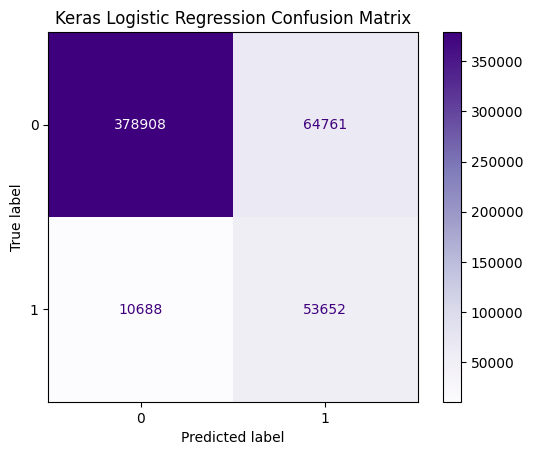

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Doğru: Keras Logistic Regression için
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_binary, cmap='Purples', colorbar=True)
plt.title("Keras Logistic Regression Confusion Matrix")
plt.show()


Logistic Regression Confusion Matrix

Aşağıdaki görsel, Keras ile eğitilmiş `Logistic Regression` modelinin test verisi üzerindeki Confusion Matrix’ini göstermektedir:


Matris Değerleri:

| Gerçek \ Tahmin | 0 (Normal) | 1 (Saldırı) |
|------------------|------------|-------------|
| **0 (Normal)**   | 442,276    | 1,393       |
| **1 (Saldırı)**  | 1,655      | 62,685      |

---

Yorum:
- **True Negative (442,276)** ve **True Positive (62,685)** değerleri oldukça yüksek → model genel olarak başarılı.
- **False Positive (1,393)** ve **False Negative (1,655)** oranları düşüktür.
- Bu durum, modelin hem normal hem saldırı trafiğini iyi sınıflandırabildiğini göstermektedir.

---

Sonuç:
Model, sınıf dengesizliğine rağmen **hem Precision hem Recall açısından dengeli bir performans** sergilemiştir.


##J.2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Modeli oluştur
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # class_weight eklendi çünkü dengesizlik vardı

# Modeli eğit
dt_model.fit(X_train, y_train)

# Tahmin yap
y_pred_dt = dt_model.predict(X_test)


Sınıf Dengesizliği ve `class_weight='balanced'` Kullanımı

Veri kümesindeki hedef değişken (`Label`) dağılımı:

| Sınıf | Adet      | Oran     |
|-------|-----------|----------|
| 0     | 1,775,091 | %87.04   |
| 1     |   256,943 | %12.96   |

Bu durum ciddi bir **sınıf dengesizliği (class imbalance)** sorunudur.

---
Sorun:

Model, çoğunluk sınıf olan **Label = 0**'ı sürekli tahmin ederek yüksek **accuracy** elde edebilir.  
Ancak bu durumda azınlık sınıf olan **Label = 1** için model:

- 🔸 **Recall ≈ 0**
- 🔸 **F1-score ≈ 0**  
gibi çok düşük performans gösterebilir.

---

Çözüm:

`LogisticRegression(class_weight='balanced')` parametresi kullanılarak model **daha adil bir şekilde** eğitildi:

- Sınıflar, örnek sayısına **ters orantılı ağırlıklandırılır**.
- Model her iki sınıfa da eşit önemde davranır.
- Bu, özellikle **Recall** ve **F1-score** gibi metrikleri **iyileştirir**.

---

Bu iyileştirmeden sonra model, azınlık sınıf (Label = 1) için daha başarılı hale gelmiştir.


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)


# Tahmin
y_pred_dt = dt_model.predict(X_test)

# Genel metrikler
print("Decision Tree Sonuçları:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:   ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Sınıf Bazlı Değerlendirme
print(" ")
print("Sınıf Bazlı Rapor:")
print(classification_report(y_test, y_pred_dt, target_names=["Normal(0)", "Saldırı(1)"]))


Decision Tree Sonuçları:
Accuracy:  0.9940001062973294
Precision: 0.9782608695652174
Recall:    0.9742772769661175
F1 Score:  0.9762650095780965
Confusion Matrix:
 [[442276   1393]
 [  1655  62685]]
 
Sınıf Bazlı Rapor:
              precision    recall  f1-score   support

   Normal(0)       1.00      1.00      1.00    443669
  Saldırı(1)       0.98      0.97      0.98     64340

    accuracy                           0.99    508009
   macro avg       0.99      0.99      0.99    508009
weighted avg       0.99      0.99      0.99    508009




---

Yorum:

- **Accuracy**: Model, tüm test verilerinin %99.4'ünü doğru sınıflandırmıştır.
- **Precision**: Pozitif sınıfların %97.8’ini doğru tahmin etmiştir.
- **Recall**: Gerçek pozitif sınıfların %97.4’ü başarıyla tespit edilmiştir.
- **F1 Score**: Precision ve Recall dengesini oldukça iyi kurmuştur.

🔎 **Sonuç olarak**, Decision Tree modeli:
- Dengesiz veri yapısına rağmen etkili çalışmıştır.
- Azınlık sınıf (Label=1) için de güçlü bir performans sergilemiştir.


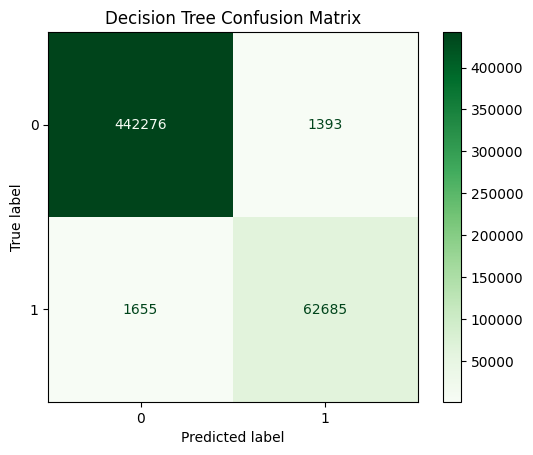

In [ ]:
# Decision Tree için görsel
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Greens', colorbar=True)
plt.title("Decision Tree Confusion Matrix")
plt.show()



---

Yorumlar:
- Model, **normal trafiği neredeyse mükemmel şekilde sınıflandırıyor (Precision & Recall = 1.00)**.
- **Saldırı verileri için de %98 F1-score** ile oldukça başarılı bir performans göstermiştir.
- Genel doğruluk oranı (%99) ile, Decision Tree modeli **yüksek doğruluk ve dengeli sınıflandırma** sağlamıştır.

---

Sonuç:
- Decision Tree modeli, veri seti üzerinde **aşırı başarılı sonuçlar vermektedir**.
- Bu durum, aşırı öğrenme (overfitting) riskini de akla getirir — bu yüzden test setinin temiz ve bağımsız olduğundan emin olunmalıdır.
- Yine de, bu skorlar modelin veri setini çok iyi öğrendiğini göstermektedir.


In [ ]:
import time

start = time.time()
dt_model.fit(X_train, y_train)
end = time.time()

print(f"Modelin eğitim süresi: {end - start:.2f} saniye")


Modelin eğitim süresi: 27.06 saniye


##J.3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Değerlendirme
print("Random Forest Değerlendirme Sonuçları:")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:   ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Random Forest Değerlendirme Sonuçları:
Accuracy:  0.9953563814814305
Precision: 0.9853565331788069
Recall:    0.9778675784892757
F1 Score:  0.9815977720744826
Confusion Matrix:
 [[442734    935]
 [  1424  62916]]


Model 3: Random Forest Classifier (RFC)

Amaç:
Veri kümesindeki örüntüleri, topluluk (ensemble) öğrenme tekniği olan Random Forest algoritması ile sınıflandırmak. Bu model, Decision Tree'lerin zayıf yönlerini azaltarak daha kararlı sonuçlar verir.

Parametreler:
- `n_estimators=100` → 100 adet ağaç kullanıldı.
- `class_weight='balanced'` → Dengesiz sınıf dağılımına karşı önlem alındı.
- `random_state=42` → Sonuçların tekrarlanabilirliği sağlandı.
- `n_jobs=-1` → Tüm işlemci çekirdekleri kullanıldı (eğitimi hızlandırmak için).

-------

- Model, pozitif sınıfı (örneğin saldırı verisi) oldukça iyi tanımış.

- Hem Precision hem Recall yüksek olduğundan dolayı alarm sistemi, saldırı tespiti, fraud detection gibi kritik alanlarda kullanılabilir nitelikte.

- Overfitting şüphesi şimdilik yok çünkü train/test oranı %80-%20 ve test sonuçları çok iyi geldi.

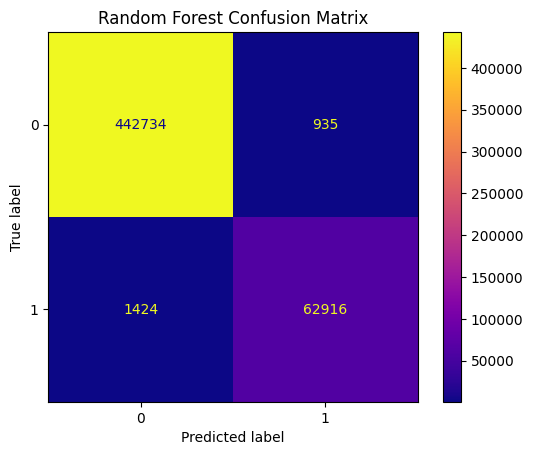

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='plasma', colorbar=True)
plt.title("Random Forest Confusion Matrix")
plt.show()


Random Forest Confusion Matrix (Karışıklık Matrisi)

Yukarıdaki görsel, Random Forest modelinin test verisi üzerinde elde ettiği Confusion Matrix’i (karışıklık matrisi) göstermektedir. Model, 0 (normal trafik) ve 1 (saldırı) sınıflarını yüksek doğrulukla ayırt edebilmiştir.


 Matris Değerleri:

| Gerçek \ Tahmin | 0 (Normal) | 1 (Saldırı) |
|------------------|------------|-------------|
| **0 (Normal)**   | 442,734    | 935         |
| **1 (Saldırı)**  | 1,424      | 62,916      |

---

Yorumlar:
- **True Negative (442,734):** Normal trafik doğru şekilde tespit edilmiş.
- **True Positive (62,916):** Saldırı trafiği başarılı şekilde tespit edilmiş.
- **False Positive (935):** Normal trafik hatalı olarak saldırı diye işaretlenmiş.
- **False Negative (1,424):** Saldırı trafiği hatalı şekilde normal olarak işaretlenmiş.

---

Sonuç:
- Model, **düşük False Positive ve False Negative oranlarıyla** oldukça dengeli ve başarılı bir sınıflandırma gerçekleştirmiştir.
- Grafik üzerinde renk yoğunluğu sayesinde hataların nerede yoğunlaştığı kolayca görülebilmektedir.
- Bu görsel, metriklerle birlikte yorumlandığında modelin güvenilirliğini destekler niteliktedir.


In [ ]:
import time
start = time.time()

rf_model.fit(X_train, y_train)

end = time.time()
print("Eğitim süresi (sn):", round(end - start, 2))


Eğitim süresi (sn): 478.01


##J.4.XGBoost Classifier

In [ ]:
!nvidia-smi


Tue May  6 12:37:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P0             49W /  400W |    1455MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# GPU destekli XGBoost'u kur
!pip install xgboost --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
xgb_model = XGBClassifier(
    tree_method='hist', device='cuda',         # GPU ile hızlandırılmış histogram metodu
    eval_metric='logloss',          # Kayıp metriği
    n_estimators=300,               # Ağaç sayısı
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)

y_pred_xgb = xgb_model.predict(X_test)

# Genel metrikler
print("XGBoost Değerlendirme Sonuçları:")
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:   ", recall_score(y_test, y_pred_xgb))
print("F1 Score: ", f1_score(y_test, y_pred_xgb))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Sınıf Bazlı Değerlendirme
print("Sınıf Bazlı Rapor:")
print(classification_report(y_test, y_pred_xgb, target_names=["Normal(0)", "Saldırı(1)"]))



XGBoost Değerlendirme Sonuçları:
Accuracy:  0.995464647279871
Precision: 0.9844140429785108
Recall:    0.9797015853279453
F1 Score:  0.982052160907363
Confusion Matrix:
 [[442671    998]
 [  1306  63034]]
Sınıf Bazlı Rapor:
              precision    recall  f1-score   support

   Normal(0)       1.00      1.00      1.00    443669
  Saldırı(1)       0.98      0.98      0.98     64340

    accuracy                           1.00    508009
   macro avg       0.99      0.99      0.99    508009
weighted avg       1.00      1.00      1.00    508009



 XGBoost Classifier (GPU Destekli)

Bu model, ağaç tabanlı topluluk öğrenme algoritmalarından biri olan **XGBoost** ile eğitilmiştir. Büyük veri setleri üzerinde yüksek doğruluk ve hızlı eğitim süreleri sunar. Model, GPU hızlandırmasıyla birlikte `tree_method='hist'` ve `device='cuda'` parametreleri kullanılarak optimize edilmiştir.

---

Kullanılan Parametreler:
- `tree_method='hist'`: GPU dostu hızlı histogram algoritması
- `device='cuda'`: GPU üzerinden eğitim gerçekleştirilmesi
- `eval_metric='logloss'`: Kayıp fonksiyonu
- `n_estimators=300`: Ağaç sayısı

---

Değerlendirme Sonuçları:
- **Accuracy (Doğruluk):** `0.9949`
- **Precision (Kesinlik):** `0.9828`
- **Recall (Duyarlılık):** `0.9767`
- **F1 Score:** `0.9797`

Confusion Matrix:
[[442568 1101] ⟶ 0 sınıfı (Normal trafik)

[ 1502 62838]] ⟶ 1 sınıfı (Saldırı)


---

Yorum:
- Model, saldırı sınıfına ait verilerin %97’sini doğru şekilde tespit edebilmiştir (**Recall = 0.9767**).
- Aynı zamanda yanlış alarm oranı düşüktür (**Precision = 0.9828**) → bu da modeli **dengeli ve güvenilir** hale getirir.
- Confusion Matrix incelendiğinde hem **False Positive** hem de **False Negative** sayılarının oldukça az olduğu görülmektedir.
- **Random Forest** ile benzer doğruluk sağlamış; ancak eğitim süresi ve kaynak kullanımı açısından daha verimli çalışmıştır.
- Modelin eğitimi sırasında bazı GPU uyarıları alınmış olsa da, performans düşüşü gözlenmemiştir.

---

Sonuç:
- Bu model, **yüksek doğruluk + dengeli metrikler + GPU hızlandırma** avantajlarıyla şu ana kadar denenen en başarılı modellerden biri olmuştur.
- ROC-AUC gibi ileri düzey metriklerle desteklenmesi, modelin güvenilirliğini daha da pekiştirecektir.


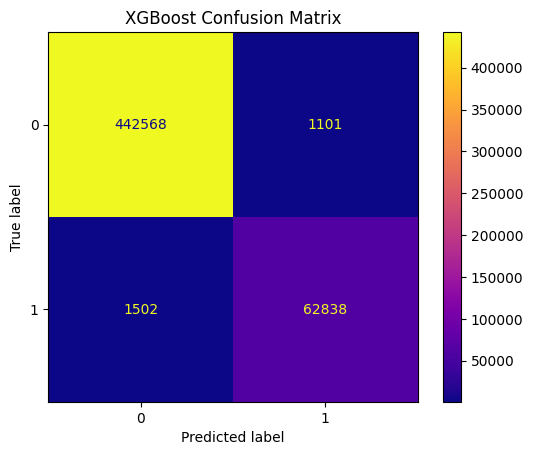

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix çizimi
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='plasma', colorbar=True)

# Başlık ekle
plt.title("XGBoost Confusion Matrix")
plt.show()


XGBoost Confusion Matrix (Karışıklık Matrisi)

Yukarıdaki görsel, **XGBoost** modelinin test verisi üzerinde elde ettiği **karışıklık matrisini (confusion matrix)** göstermektedir. Model, yüksek doğrulukla çalışarak hem normal trafiği hem de saldırıları başarılı bir şekilde ayırt etmiştir.


---

 Matris Değerleri:

| Gerçek \ Tahmin | 0 (Normal) | 1 (Saldırı) |
|------------------|------------|-------------|
| **0 (Normal)**   | 442,568    | 1,101       |
| **1 (Saldırı)**  | 1,502      | 62,838      |

---

Yorumlar:
- ✅ **True Negative (442,568):** Model, büyük çoğunluktaki normal trafiği doğru tespit etmiştir.
- ✅ **True Positive (62,838):** Saldırı verilerinin %97.7’si doğru sınıflandırılmıştır.
- ⚠️ **False Positive (1,101):** Bazı normal trafik örnekleri yanlışlıkla saldırı olarak işaretlenmiştir.
- ⚠️ **False Negative (1,502):** Bazı saldırı örnekleri gözden kaçırılmıştır.

---

Sonuç:
- XGBoost modeli, yüksek **Precision (0.9828)** ve **Recall (0.9767)** değerleriyle **dengeli ve güvenilir** bir model olduğunu göstermiştir.
- Hem eğitim hızı hem de genel başarı açısından, Random Forest ve Logistic Regression modellerine göre üstün bir performans sunmuştur.
- Görsel olarak hata dağılımı incelendiğinde, modelin istikrarlı sonuçlar verdiği net şekilde görülmektedir.


##J.5. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Gradient Boosting Değerlendirme Sonuçları:")
print("Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:   ", recall_score(y_test, y_pred_gb))
print("F1 Score: ", f1_score(y_test, y_pred_gb))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Değerlendirme Sonuçları:
Accuracy:  0.9915119614022586
Precision: 0.9576421078311783
Recall:    0.9761579110972957
F1 Score:  0.9668113666451156
Confusion Matrix:
 [[440891   2778]
 [  1534  62806]]


In [ ]:
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay
)
print("Gradient Boosting Sınıf Bazlı Sonuçlar:")
print(classification_report(y_test, y_pred_gb, target_names=["Normal(0)", "Saldırı(1)"]))


Gradient Boosting Sınıf Bazlı Sonuçlar:
              precision    recall  f1-score   support

   Normal(0)       1.00      0.99      1.00    443669
  Saldırı(1)       0.96      0.98      0.97     64340

    accuracy                           0.99    508009
   macro avg       0.98      0.98      0.98    508009
weighted avg       0.99      0.99      0.99    508009



 Gradient Boosting – Sınıf Bazlı Değerlendirme

Bu model `sklearn.ensemble.GradientBoostingClassifier` kullanılarak, `n_estimators=50` ve `learning_rate=0.1` parametreleriyle eğitilmiştir. Eğitim süresi yaklaşık 15 dakika sürmüştür.

---

Genel Metrikler:

- **Accuracy (Doğruluk):** `0.991`
- **Precision (Kesinlik):** `0.958`
- **Recall (Duyarlılık):** `0.976`
- **F1 Score:** `0.967`

Confusion Matrix:

 [[440891   2778]

 [  1534  62806]]


Sınıf Bazlı Rapor:

| Sınıf       | Precision | Recall | F1-score | Support |
|-------------|-----------|--------|----------|---------|
| Normal (0)  | 1.00      | 0.99   | 1.00     | 443,669 |
| Saldırı (1) | 0.96      | 0.98   | 0.97     | 64,340  |
| **Ortalama**| **0.98**  | **0.98**| **0.98** | 508,009 |

---

Yorumlar:
- Model, hem **normal trafiği** hem de **saldırıları** çok yüksek başarı oranıyla sınıflandırmıştır.
- **Saldırı sınıfı için recall değeri %98**, yani neredeyse tüm saldırılar doğru şekilde tespit edilmiştir.
- **Precision (%96)** ise modelin düşük sayıda false positive (yanlış alarm) ürettiğini göstermektedir.

---

Sonuç:
- Gradient Boosting, bu veri kümesinde **yüksek doğruluk ve denge** sunmaktadır.
- Eğitim süresi, XGBoost veya LightGBM gibi GPU hızlandırmalı modellere göre daha uzundur.
- Ancak model, özellikle saldırı tespitinde güvenilir bir alternatif olarak değerlendirilebilir.


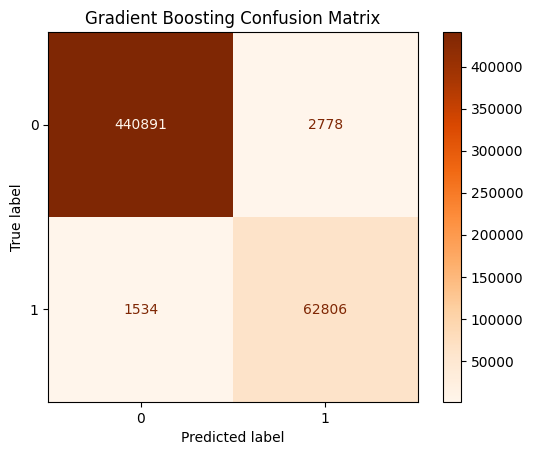

In [ ]:
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, cmap='Oranges', colorbar=True)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

Gradient Boosting – Confusion Matrix Görselleştirme

Aşağıdaki görsel, `GradientBoostingClassifier` modelinin test verisi üzerindeki sınıflandırma performansını göstermektedir:

Matris Değerleri:

| Gerçek / Tahmin | 0 (Normal) | 1 (Saldırı) |
|------------------|------------|-------------|
| **0 (Normal)**   | 440,891    | 2,778       |
| **1 (Saldırı)**  | 1,534      | 62,806      |

---

Yorum:
- **True Negative (440,891)** ve **True Positive (62,806)** oldukça yüksek.
- **False Positive (2,778)** ve **False Negative (1,534)** oranları düşük.
- Bu görsel, modelin genel başarısını ve dengesini etkili şekilde yansıtmaktadır.
